# Подключение библиотек

In [1]:
from transformers import TextClassificationPipeline, AutoModelForSequenceClassification, AutoTokenizer, AutoModelForCausalLM, pipeline
from huggingface_hub import InferenceClient
import torch
from dotenv import load_dotenv
from newsapi import NewsApiClient
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import tqdm
import matplotlib.pyplot as plt

import os
import re
import signal
from functools import wraps
from datetime import datetime, timedelta
from IPython.display import clear_output

load_dotenv()

True

# Получение новостей по BTC

In [2]:
newsapi = NewsApiClient(api_key=os.getenv('NEWSAPI_KEY'))

In [45]:
to_time = datetime.utcnow()
from_time = now - timedelta(hours=24*28)

from_time = from_time.strftime('%Y-%m-%dT%H:%M:%S')
to_time = to_time.strftime('%Y-%m-%dT%H:%M:%S')

In [46]:
news_data = newsapi.get_everything(
    q='bitcoin', 
    language='en',
    from_param=from_time,
    to=to_time,
    sort_by='publishedAt',
    sources='crypto-coins-news, ars-technica, bloomberg, business-insider, the-next-web, the-verge, wired,' +\
    'reuters, the-washington-post, reddit-r-all, hacker-news, the-wall-street-journal, associated-press, time'
)

In [72]:
to_time = datetime.utcnow()
from_time = now - timedelta(hours=24+10)

from_time = from_time.strftime('%Y-%m-%dT%H:%M:%S')
to_time = to_time.strftime('%Y-%m-%dT%H:%M:%S')

In [73]:
from_time, to_time

('2024-10-07T04:38:44', '2024-10-08T15:37:39')

In [74]:
now_data = newsapi.get_everything(
    q='bitcoin', 
    language='en',
    from_param=from_time,
    to=to_time,
    sort_by='publishedAt',
    sources='crypto-coins-news, ars-technica, bloomberg, business-insider, the-next-web, the-verge, wired,' +\
    'reuters, the-washington-post, reddit-r-all, hacker-news, the-wall-street-journal, associated-press, time'
)

In [75]:
now_data

{'status': 'ok',
 'totalResults': 1,
 'articles': [{'source': {'id': 'business-insider',
    'name': 'Business Insider'},
   'author': 'mfox@businessinsider.com (Matthew Fox)',
   'title': 'Stock market today: Indexes slip as bond yields jump after strong jobs data',
   'description': '"We can\'t rule out \'higher for longer\' making a comeback this winter," Yardeni Research said of the strong jobs report and recent jump in rates.',
   'url': 'https://markets.businessinsider.com/news/stocks/stock-market-today-key-bond-yields-jump-on-jobs-data-2024-10',
   'urlToImage': 'https://i.insider.com/6703de133f2165d716decac5?width=1200&format=jpeg',
   'publishedAt': '2024-10-07T13:36:01Z',
   'content': 'US stocks dipped to start the week as investors assessed the outlook for interest rates following the strong September jobs report.\r\nThe market is taking a breather after ending last week with the fo… [+1907 chars]'}]}

In [53]:
len(news_data["articles"])

50

In [51]:
news_data["articles"][0].keys()

dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])

In [52]:
def clean_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text(separator=" ", strip=True)

In [53]:
news_df = pd.DataFrame(
    columns=["content", "title_and_description", "source", "published_at"]
)

In [54]:
for article in news_data["articles"]:
    new_row = {
        "content": clean_html(article["content"]), 
        "title_and_description": clean_html(article["title"] + " " + article["description"]), 
        "source": article["source"]["name"], 
        "published_at": article["publishedAt"]
    }
    news_df = news_df._append(new_row, ignore_index=True)

/tmp/ipykernel_18/1514376532.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/tmp/ipykernel_18/1514376532.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [55]:
news_df

,content,title_and_description,source,published_at
0,US stocks surged about 1% on Friday after the ...,Stock market today: US stocks notch 4-week win...,Business Insider,2024-10-04T20:10:21Z
1,US stocks surged on Friday after the September...,Stock market today: US stocks jump after blowo...,Business Insider,2024-10-04T13:42:52Z
2,Markets closed lower on Thursday amid rising f...,"Stock market today: Indexes fall, oil surges o...",Business Insider,2024-10-03T20:11:36Z
3,"The big boys want in on crypto, too\r\nThe big...","The big boys want in on crypto, too Visa, PayP...",The Verge,2024-10-03T19:32:35Z
4,"US stocks inched lower on Thursday, fueled by ...",Stock markets today: Indexes slip as jobless c...,Business Insider,2024-10-03T13:37:41Z
5,US stocks ended slightly higher on Wednesday a...,Stock market today: US stocks edge up amid Mid...,Business Insider,2024-10-02T20:08:12Z
6,US stocks dropped Wednesday as traders continu...,Stock market today: Indexes extend losses as t...,Business Insider,2024-10-02T13:41:48Z
7,Stock indexes dropped on Tuesday as escalating...,"Stocks tumble, oil spikes as Mideast tensions ...",Business Insider,2024-10-01T20:31:47Z
8,Major stock indexes slid on Tuesday to kick of...,Stock market today: Indexes slide as investors...,Business Insider,2024-10-01T13:50:30Z
9,Paid non-client promotion: Affiliate links for...,Putting some retirement savings in bitcoin mig...,Business Insider,2024-10-01T12:42:02Z


Добавляем новые столбцы данных для результатов моделей

In [56]:
news_df["cryptobert_embedding"] = pd.Series([[] for _ in range(len(news_df))], dtype=object)

news_df["cryptobert_content_sentiment"] = ""
news_df["cryptobert_content_score"] = np.nan
news_df["cryptobert_title_and_description_sentiment"] = ""
news_df["cryptobert_title_and_description_score"] = np.nan

news_df["finbert_content_sentiment"] = ""
news_df["finbert_content_score"] = np.nan
news_df["finbert_title_and_description_sentiment"] = ""
news_df["finbert_title_and_description_score"] = np.nan

news_df["Llama-3-8B_content_sentiment"] = ""
news_df["Llama-3-8B_content_score"] = np.nan
news_df["Llama-3-8B_title_and_description_sentiment"] = ""
news_df["Llama-3-8B_title_and_description_score"] = np.nan

news_df["Llama-3.2-3B_content_sentiment"] = ""
news_df["Llama-3.2-3B_content_score"] = np.nan
news_df["Llama-3.2-3B_title_and_description_sentiment"] = ""
news_df["Llama-3.2-3B_title_and_description_score"] = np.nan

news_df["Phi-3.5-mini_content_sentiment"] = ""
news_df["Phi-3.5-mini_content_score"] = np.nan
news_df["Phi-3.5-mini_title_and_description_sentiment"] = ""
news_df["Phi-3.5-mini_title_and_description_score"] = np.nan

news_df["Mistral-7B-v0.3_content_sentiment"] = ""
news_df["Mistral-7B-v0.3_content_score"] = np.nan
news_df["Mistral-7B-v0.3_title_and_description_sentiment"] = ""
news_df["Mistral-7B-v0.3_title_and_description_score"] = np.nan

news_df["Gemma-2-27b_content_sentiment"] = ""
news_df["Gemma-2-27b_content_score"] = np.nan
news_df["Gemma-2-27b_title_and_description_sentiment"] = ""
news_df["Gemma-2-27b_title_and_description_score"] = np.nan

news_df["Mistral-8x7B-v0.1_content_sentiment"] = ""
news_df["Mistral-8x7B-v0.1_content_score"] = np.nan
news_df["Mistral-8x7B-v0.1_title_and_description_sentiment"] = ""
news_df["Mistral-8x7B-v0.1_title_and_description_score"] = np.nan

In [57]:
news_df.columns

Index(['content', 'title_and_description', 'source', 'published_at',
       'cryptobert_embedding', 'cryptobert_content_sentiment',
       'cryptobert_content_score',
       'cryptobert_title_and_description_sentiment',
       'cryptobert_title_and_description_score', 'finbert_content_sentiment',
       'finbert_content_score', 'finbert_title_and_description_sentiment',
       'finbert_title_and_description_score', 'Llama-3-8B_content_sentiment',
       'Llama-3-8B_content_score',
       'Llama-3-8B_title_and_description_sentiment',
       'Llama-3-8B_title_and_description_score',
       'Llama-3.2-3B_content_sentiment', 'Llama-3.2-3B_content_score',
       'Llama-3.2-3B_title_and_description_sentiment',
       'Llama-3.2-3B_title_and_description_score',
       'Phi-3.5-mini_content_sentiment', 'Phi-3.5-mini_content_score',
       'Phi-3.5-mini_title_and_description_sentiment',
       'Phi-3.5-mini_title_and_description_score',
       'Mistral-7B-v0.3_content_sentiment', 'Mistral-7B-v0

# Обработка тектовых данных

## Подготовка моделей

In [178]:
HUGGINGFACE_KEY = os.getenv('HUGGINGFACE_KEY')

client = InferenceClient(api_key=HUGGINGFACE_KEY)

In [58]:
LLM_PROMT = f"""Conduct a sentiment analysis of the following news story and provide a response in the following format:

- **Tonality**: Positive/Negative/Neutral
- **Confidence**: a number between 0 and 1

*Do not write anything other than these pauncts*

News text: """ # Здесб юудет даписываться текст новости

In [59]:
HUGGINGFACE_MODELS = [
    "meta-llama/Meta-Llama-3-8B-Instruct",
    "meta-llama/Llama-3.2-3B-Instruct",
    "microsoft/Phi-3.5-mini-instruct",
    "mistralai/Mistral-7B-Instruct-v0.3",
    "google/gemma-2-27b-it",
    "mistralai/Mixtral-8x7B-Instruct-v0.1"
]

### CryptoBERT

In [60]:
cryptobert_name = "ElKulako/cryptobert"

cryptobert_tokenizer = AutoTokenizer.from_pretrained(cryptobert_name, use_fast=True)
cryptobert = AutoModelForSequenceClassification.from_pretrained(cryptobert_name, num_labels=3, output_hidden_states=True)
cryptobert_pipe = TextClassificationPipeline(model=cryptobert, tokenizer=cryptobert_tokenizer, max_length=64, truncation=True, padding='max_length')

/usr/local/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [61]:
def cryptobert_sentiment_calculate(news_text):
    global cryptobert_pipe
    
    preds = cryptobert_pipe(news_text)

    if preds[0]['label'] == "Bullish":
        preds = [{"score": preds[0]["score"], "label": "Positive"}]
    elif preds[0]['label'] == "Bearish":
        preds = [{"score": preds[0]["score"], "label": "Negative"}]

    return preds

In [62]:
def cryptobert_sentiment_embedding_calculate(news_text):
    global cryptobert_tokenizer, cryptobert
    
    inputs = cryptobert_tokenizer(
        [news_text],
        padding=True,
        truncation=True,
        max_length=64,
        return_tensors="pt"
    )

    with torch.no_grad():
        outputs = cryptobert(**inputs)
        hidden_states = outputs.hidden_states
    
    last_hidden_state = hidden_states[-1]
    embedding = last_hidden_state[:, 0, :][0]

    return embedding

### FinBERT

In [63]:
finbert_name = "yiyanghkust/finbert-tone"

finbert_tokenizer = AutoTokenizer.from_pretrained(finbert_name, use_fast=True)
finbert = AutoModelForSequenceClassification.from_pretrained(finbert_name, num_labels = 3)
finbert_pipe = TextClassificationPipeline(model=finbert, tokenizer=finbert_tokenizer, max_length=64, truncation=True, padding='max_length')

In [64]:
def finbert_sentiment_calculate(news_text):
    global finbert_pipe
    
    preds = finbert_pipe(news_text)

    return(preds)

### LLMs

In [65]:
def timeout(seconds, fallback=None):
    """
    ВНИМАНИЕ! ЭТА ФУНКЦИЯ РАБОТАЕТ ТОЛЬКО НА UNIX СИСТЕМАХ
    """
    def decorator(func):
        def _handle_timeout(signum, frame):
            raise Exception(f"Функция {func.__name__} превысила лимит времени в {seconds} секунд")
        
        @wraps(func)
        def wrapper(*args, **kwargs):
            # Устанавливаем обработчик сигнала
            signal.signal(signal.SIGALRM, _handle_timeout)
            # Запускаем таймер
            signal.alarm(seconds)
            try:
                result = func(*args, **kwargs)
            except Exception as error:
                print("Откат по fallback")
                print(error)
                return fallback
            finally:
                # Отключаем сигнал
                signal.alarm(0)
            return result
        return wrapper
    return decorator

In [66]:
def extract_data_from_llm_response(text):
    tonality_pattern = r'\*\*(Tonality|Sentiment)\*\*:\s*\/?([A-Za-z]+)'
    confidence_pattern = r'\*\*Confidence\*\*:\s*([0-9.]+)'

    tonality_match = re.search(tonality_pattern, text)
    confidence_match = re.search(confidence_pattern, text)
    
    tonality = tonality_match.group(2) if tonality_match else None
    confidence = float(confidence_match.group(1)) if confidence_match else None
    
    return {
        'label': tonality,
        'score': confidence
    }

In [186]:
@timeout(
    seconds=30,
    fallback=({'label': 'None', 'score': 0}, '')
)
def llm_huggingface_sentiment_calculate(news_text, model="mistralai/Mistral-7B-Instruct-v0.3", max_tokens=50, temperature=0.8):
    global HUGGINGFACE_MODELS, LLM_PROMT, client
    if model not in HUGGINGFACE_MODELS:
        raise Exception("Нет информации о предоставленной модели")

    try:
        content = LLM_PROMT + f'"{news_text}"'
        llm_promt_result = ""
    
        for message in client.chat_completion(
        	model=model,
        	messages=[{"role": "user", "content": content}],
        	max_tokens=max_tokens,
        	stream=True,
            temperature=temperature
        ):
            llm_promt_result += message.choices[0].delta.content
    
        if llm_promt_result == "":
            return {'label': 'None', 'score': 0}, llm_promt_result
        else:
            result = extract_data_from_llm_response(llm_promt_result)
            if result['score'] is None:
                result['score'] = 0
            
            if result['label'] not in ['Neutral', 'Positive', 'Negative']:
                return {'label': 'None', 'score': 0}, llm_promt_result
            else:
                return result, llm_promt_result
    except Exception as error:
        raise error

## Работа с данными

In [137]:
idx = 0

In [269]:
%%timeit
cryptobert_sentiment_embedding_calculate(news_df.loc[idx, "title_and_description"])

114 ms ± 1.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [270]:
%%timeit
cryptobert_sentiment_calculate(news_df.loc[idx, "title_and_description"])

118 ms ± 1.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [271]:
%%timeit
finbert_sentiment_calculate(news_df.loc[idx, "title_and_description"])

121 ms ± 4.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [272]:
%%timeit
llm_huggingface_sentiment_calculate(news_df.loc[idx, "title_and_description"], HUGGINGFACE_MODELS[0])

138 ms ± 603 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [273]:
%%timeit
llm_huggingface_sentiment_calculate(news_df.loc[idx, "title_and_description"], HUGGINGFACE_MODELS[1])

138 ms ± 984 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [274]:
%%timeit
llm_huggingface_sentiment_calculate(news_df.loc[idx, "title_and_description"], HUGGINGFACE_MODELS[2])

144 ms ± 2.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [275]:
%%timeit
llm_huggingface_sentiment_calculate(news_df.loc[idx, "title_and_description"], HUGGINGFACE_MODELS[3])

143 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [276]:
%%timeit
llm_huggingface_sentiment_calculate(news_df.loc[idx, "title_and_description"], HUGGINGFACE_MODELS[4])

138 ms ± 703 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [277]:
%%timeit
llm_huggingface_sentiment_calculate(news_df.loc[idx, "title_and_description"], HUGGINGFACE_MODELS[5])

142 ms ± 444 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [70]:
embeddings = []

for idx in tqdm.tqdm(range(news_df.shape[0])): 
    embeddings += [cryptobert_sentiment_embedding_calculate(news_df.loc[idx, "title_and_description"]).tolist()]
    
    cryptobert_content = cryptobert_sentiment_calculate(news_df.loc[idx, "content"])[0]
    cryptobert_title_and_description = cryptobert_sentiment_calculate(news_df.loc[idx, "title_and_description"])[0]
    news_df.loc[idx, "cryptobert_content_sentiment"] = cryptobert_content['label']
    news_df.loc[idx, "cryptobert_content_score"] = cryptobert_content['score']
    news_df.loc[idx, "cryptobert_title_and_description_sentiment"] = cryptobert_title_and_description['label']
    news_df.loc[idx, "cryptobert_title_and_description_score"] = cryptobert_title_and_description['score']

    finbert_content = finbert_sentiment_calculate(news_df.loc[idx, "content"])[0]
    finbert_title_and_description = finbert_sentiment_calculate(news_df.loc[idx, "title_and_description"])[0]
    news_df.loc[idx, "finbert_content_sentiment"] = finbert_content['label']
    news_df.loc[idx, "finbert_content_score"] = finbert_content['score']
    news_df.loc[idx, "finbert_title_and_description_sentiment"] = finbert_title_and_description['label']
    news_df.loc[idx, "finbert_title_and_description_score"] = finbert_title_and_description['score']

    llama_3_8B_content = llm_huggingface_sentiment_calculate(news_df.loc[idx, "content"], HUGGINGFACE_MODELS[0])[0]
    llama_3_8B_title_and_description = llm_huggingface_sentiment_calculate(news_df.loc[idx, "title_and_description"], HUGGINGFACE_MODELS[0])[0]
    news_df.loc[idx, "Llama-3-8B_content_sentiment"] = llama_3_8B_content['label']
    news_df.loc[idx, "Llama-3-8B_content_score"] = llama_3_8B_content['score']
    news_df.loc[idx, "Llama-3-8B_title_and_description_sentiment"] = llama_3_8B_title_and_description['label']
    news_df.loc[idx, "Llama-3-8B_title_and_description_score"] = llama_3_8B_title_and_description['score']
    
    llama_3_2_3B_content = llm_huggingface_sentiment_calculate(news_df.loc[idx, "content"], HUGGINGFACE_MODELS[1])[0]
    llama_3_2_3B_title_and_description = llm_huggingface_sentiment_calculate(news_df.loc[idx, "title_and_description"], HUGGINGFACE_MODELS[1])[0]
    news_df.loc[idx, "Llama-3.2-3B_content_sentiment"] = llama_3_2_3B_content['label']
    news_df.loc[idx, "Llama-3.2-3B_content_score"] = llama_3_2_3B_content['score']
    news_df.loc[idx, "Llama-3.2-3B_title_and_description_sentiment"] = llama_3_2_3B_title_and_description['label']
    news_df.loc[idx, "Llama-3.2-3B_title_and_description_score"] = llama_3_2_3B_title_and_description['score']

    phi_3_5_mini_content = llm_huggingface_sentiment_calculate(news_df.loc[idx, "content"], HUGGINGFACE_MODELS[2])[0]
    phi_3_5_mini_title_and_description = llm_huggingface_sentiment_calculate(news_df.loc[idx, "title_and_description"], HUGGINGFACE_MODELS[2])[0]
    news_df.loc[idx, "Phi-3.5-mini_content_sentiment"] = phi_3_5_mini_content['label']
    news_df.loc[idx, "Phi-3.5-mini_content_score"] = phi_3_5_mini_content['score']
    news_df.loc[idx, "Phi-3.5-mini_title_and_description_sentiment"] = phi_3_5_mini_title_and_description['label']
    news_df.loc[idx, "Phi-3.5-mini_title_and_description_score"] = phi_3_5_mini_title_and_description['score']

    mistral_7B_v0_3_content = llm_huggingface_sentiment_calculate(news_df.loc[idx, "content"], HUGGINGFACE_MODELS[3])[0]
    mistral_7B_v0_3_title_and_description = llm_huggingface_sentiment_calculate(news_df.loc[idx, "title_and_description"], HUGGINGFACE_MODELS[3])[0]
    news_df.loc[idx, "Mistral-7B-v0.3_content_sentiment"] = mistral_7B_v0_3_content['label']
    news_df.loc[idx, "Mistral-7B-v0.3_content_score"] = mistral_7B_v0_3_content['score']
    news_df.loc[idx, "Mistral-7B-v0.3_title_and_description_sentiment"] = mistral_7B_v0_3_title_and_description['label']
    news_df.loc[idx, "Mistral-7B-v0.3_title_and_description_score"] = mistral_7B_v0_3_title_and_description['score']

    gemma_2_27b_content = llm_huggingface_sentiment_calculate(news_df.loc[idx, "content"], HUGGINGFACE_MODELS[4])[0]
    gemma_2_27b_title_and_description = llm_huggingface_sentiment_calculate(news_df.loc[idx, "title_and_description"], HUGGINGFACE_MODELS[4])[0]
    news_df.loc[idx, "Gemma-2-27b_content_sentiment"] = gemma_2_27b_content['label']
    news_df.loc[idx, "Gemma-2-27b_content_score"] = gemma_2_27b_content['score']
    news_df.loc[idx, "Gemma-2-27b_title_and_description_sentiment"] = gemma_2_27b_title_and_description['label']
    news_df.loc[idx, "Gemma-2-27b_title_and_description_score"] = gemma_2_27b_title_and_description['score']
    
    mistral_8x7B_content = llm_huggingface_sentiment_calculate(news_df.loc[idx, "content"], HUGGINGFACE_MODELS[5])[0]
    mistral_8x7B_title_and_description = llm_huggingface_sentiment_calculate(news_df.loc[idx, "title_and_description"], HUGGINGFACE_MODELS[5])[0]
    news_df.loc[idx, "Mistral-8x7B-v0.1_content_sentiment"] = mistral_8x7B_content['label']
    news_df.loc[idx, "Mistral-8x7B-v0.1_content_score"] = mistral_8x7B_content['score']
    news_df.loc[idx, "Mistral-8x7B-v0.1_title_and_description_sentiment"] = mistral_8x7B_title_and_description['label']
    news_df.loc[idx, "Mistral-8x7B-v0.1_title_and_description_score"] = mistral_8x7B_title_and_description['score']

news_df["cryptobert_embedding"] = embeddings

clear_output()

100%|██████████| 55/55 [09:56<00:00, 10.85s/it]


In [71]:
news_df.head()

,content,title_and_description,source,published_at,cryptobert_embedding,cryptobert_content_sentiment,cryptobert_content_score,cryptobert_title_and_description_sentiment,cryptobert_title_and_description_score,finbert_content_sentiment,...,Mistral-7B-v0.3_title_and_description_sentiment,Mistral-7B-v0.3_title_and_description_score,Gemma-2-27b_content_sentiment,Gemma-2-27b_content_score,Gemma-2-27b_title_and_description_sentiment,Gemma-2-27b_title_and_description_score,Mistral-8x7B-v0.1_content_sentiment,Mistral-8x7B-v0.1_content_score,Mistral-8x7B-v0.1_title_and_description_sentiment,Mistral-8x7B-v0.1_title_and_description_score
0,US stocks surged about 1% on Friday after the ...,Stock market today: US stocks notch 4-week win...,Business Insider,2024-10-04T20:10:21Z,"[0.22408461570739746, -0.45151036977767944, 0....",Neutral,0.636737,Positive,0.668114,Positive,...,None,0.0,None,0.00,Positive,0.80,Positive,0.85,Positive,0.80
1,US stocks surged on Friday after the September...,Stock market today: US stocks jump after blowo...,Business Insider,2024-10-04T13:42:52Z,"[0.545271635055542, -0.5789197087287903, -0.08...",Neutral,0.512202,Positive,0.608803,Positive,...,None,0.0,Positive,0.95,None,0.00,Positive,0.90,Neutral,0.60
2,Markets closed lower on Thursday amid rising f...,"Stock market today: Indexes fall, oil surges o...",Business Insider,2024-10-03T20:11:36Z,"[0.4440334141254425, -0.35581153631210327, 1.0...",Neutral,0.696073,Neutral,0.903526,Negative,...,None,0.0,None,0.00,Negative,0.85,Negative,0.85,Negative,0.85
3,"The big boys want in on crypto, too\r\nThe big...","The big boys want in on crypto, too Visa, PayP...",The Verge,2024-10-03T19:32:35Z,"[0.4644468426704407, -0.6201056838035583, 0.12...",Positive,0.746908,Positive,0.662950,Neutral,...,None,0.0,None,0.00,None,0.00,Neutral,0.70,Positive,0.80
4,"US stocks inched lower on Thursday, fueled by ...",Stock markets today: Indexes slip as jobless c...,Business Insider,2024-10-03T13:37:41Z,"[0.5597029328346252, -0.2533523440361023, 1.10...",Positive,0.498512,Neutral,0.614407,Positive,...,None,0.0,None,0.00,Negative,0.80,Negative,0.80,Negative,0.80


In [72]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 37 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   content                                            55 non-null     object 
 1   title_and_description                              55 non-null     object 
 2   source                                             55 non-null     object 
 3   published_at                                       55 non-null     object 
 4   cryptobert_embedding                               55 non-null     object 
 5   cryptobert_content_sentiment                       55 non-null     object 
 6   cryptobert_content_score                           55 non-null     float64
 7   cryptobert_title_and_description_sentiment         55 non-null     object 
 8   cryptobert_title_and_description_score             55 non-null     float64
 9   finbert_cont

## Сохранение результатов

In [75]:
news_df.to_json("news_df.json")

# Анализ результатов и отбор LLM

In [ ]:
def plot_sentiment_bar(df, column):
    df[column].value_counts().plot(kind='bar', figsize=(21, 3))
    plt.xlabel('Категория')
    plt.show()

In [ ]:
def plot_sentiment_bar_for_multiplt_columns(df, columns):
    sentiments = []
    sentiments_new = []

    for column in columns:
        sentiments += [df[column].value_counts()]
    
    for sentiment, column in zip(sentiments, columns):
        sentiment_new = sentiment.rename_axis('sentiment').reset_index(name='count')
        sentiment_new['col'] = column
        sentiments_new += [sentiment_new]

    combined_sentiments = pd.concat(sentiments_new, ignore_index=True)    
    pivot_df = combined_sentiments.pivot_table(index='col', columns='sentiment', values='count', fill_value=0)

    pivot_df.plot(kind='bar', figsize=(21, 3))
    plt.xticks(rotation=0)
    plt.xlabel('Категория')
    
    plt.show()

In [ ]:
SENTIMENT_MODELS_COLUMNS = {
    "CryptoBERT_sentiment": ["cryptobert_content_sentiment", "cryptobert_title_and_description_sentiment"],
    "CryptoBERT_score": ["cryptobert_content_score", "cryptobert_title_and_description_score"],
    "FinBERT_sentiment": ["finbert_content_sentiment", "finbert_title_and_description_sentiment"],
    "FinBERT_score": ["finbert_content_score", "finbert_title_and_description_score"],
    "Llama-3-8B_sentiment": ["Llama-3-8B_content_sentiment", "Llama-3-8B_title_and_description_sentiment"],
    "Llama-3-8B_score": ["Llama-3-8B_content_score", "Llama-3-8B_title_and_description_score"],
    "Llama-3.2-3B_sentiment": ["Llama-3.2-3B_content_sentiment", "Llama-3.2-3B_title_and_description_sentiment"],
    "Llama-3.2-3B_score": ["Llama-3.2-3B_content_score", "Llama-3.2-3B_title_and_description_score"],
    "Phi-3.5-mini_sentiment": ["Phi-3.5-mini_content_sentiment", "Phi-3.5-mini_title_and_description_sentiment"],
    "Phi-3.5-mini_score": ["Phi-3.5-mini_content_score", "Phi-3.5-mini_title_and_description_score"],
    "Mistral-7B-v0.3_sentiment": ["Mistral-7B-v0.3_content_sentiment", "Mistral-7B-v0.3_title_and_description_sentiment"],
    "Mistral-7B-v0.3_score": ["Mistral-7B-v0.3_content_score", "Mistral-7B-v0.3_title_and_description_score"],
    "Gemma-2-27b_sentiment": ["Gemma-2-27b_content_sentiment", "Gemma-2-27b_title_and_description_sentiment"],
    "Gemma-2-27b_score": ["Gemma-2-27b_content_score", "emma-2-27b_title_and_description_score"],
    "Mistral-8x7B-v0.1_sentiment": ["Mistral-8x7B-v0.1_content_sentiment", "Mistral-8x7B-v0.1_title_and_description_sentiment"],
    "Mistral-8x7B-v0.1_score": ["Mistral-8x7B-v0.1_content_score", "Mistral-8x7B-v0.1_title_and_description_score"],
}

## CryptoBERT

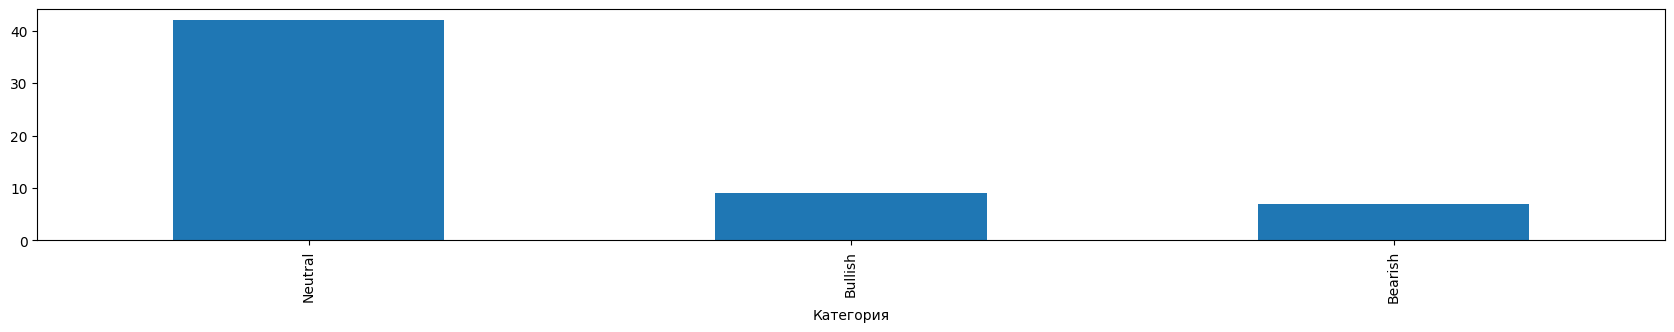

In [390]:
plot_sentiment_bar(news_df, SENTIMENT_MODELS_COLUMNS["CryptoBERT_sentiment"][0])

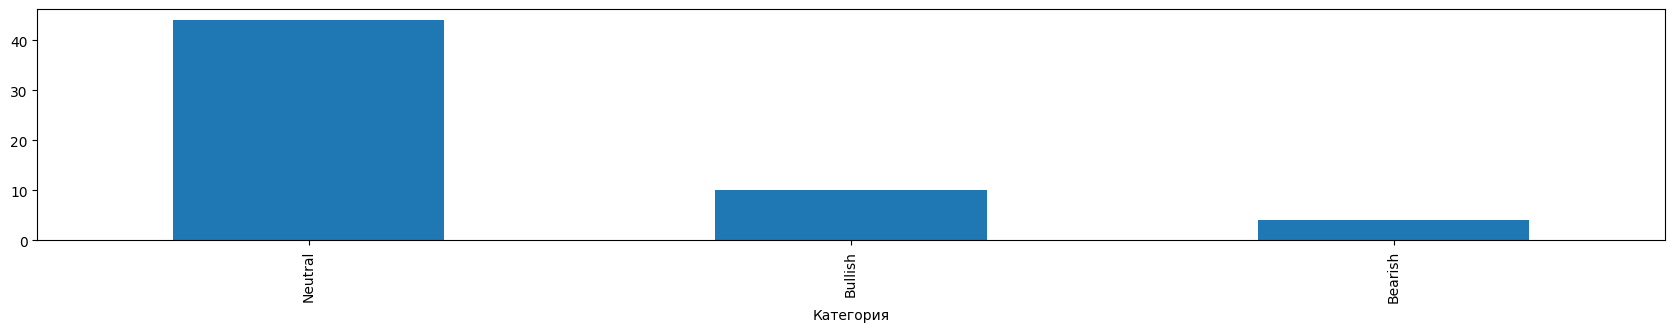

In [391]:
plot_sentiment_bar(news_df, SENTIMENT_MODELS_COLUMNS["CryptoBERT_sentiment"][1])

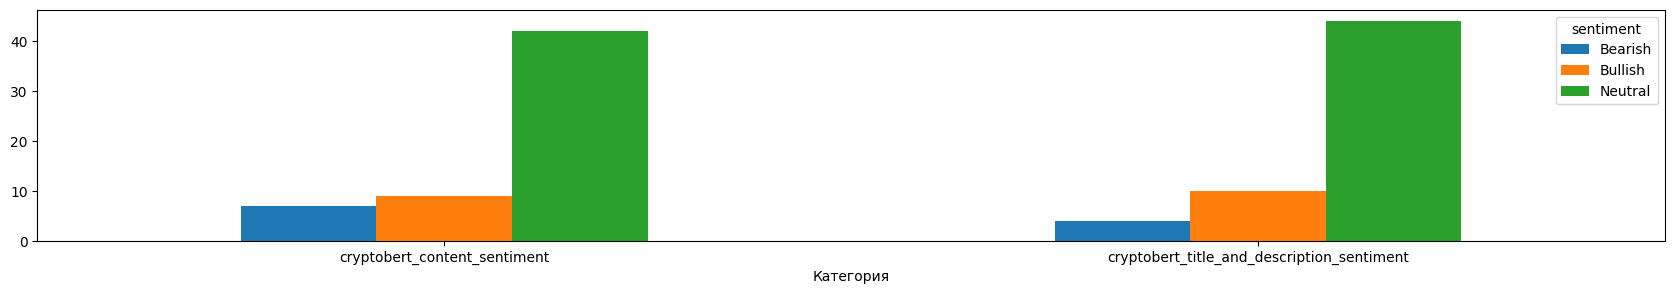

In [392]:
plot_sentiment_bar_for_multiplt_columns(
    news_df,
    SENTIMENT_MODELS_COLUMNS["CryptoBERT_sentiment"]
)

## FinBERT

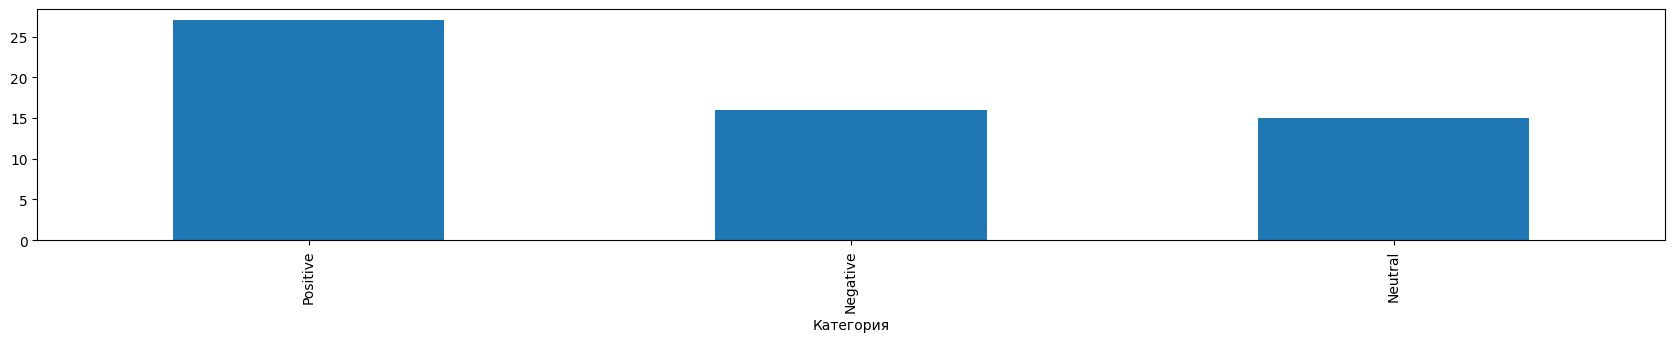

In [399]:
plot_sentiment_bar(news_df, SENTIMENT_MODELS_COLUMNS["FinBERT_sentiment"][0])

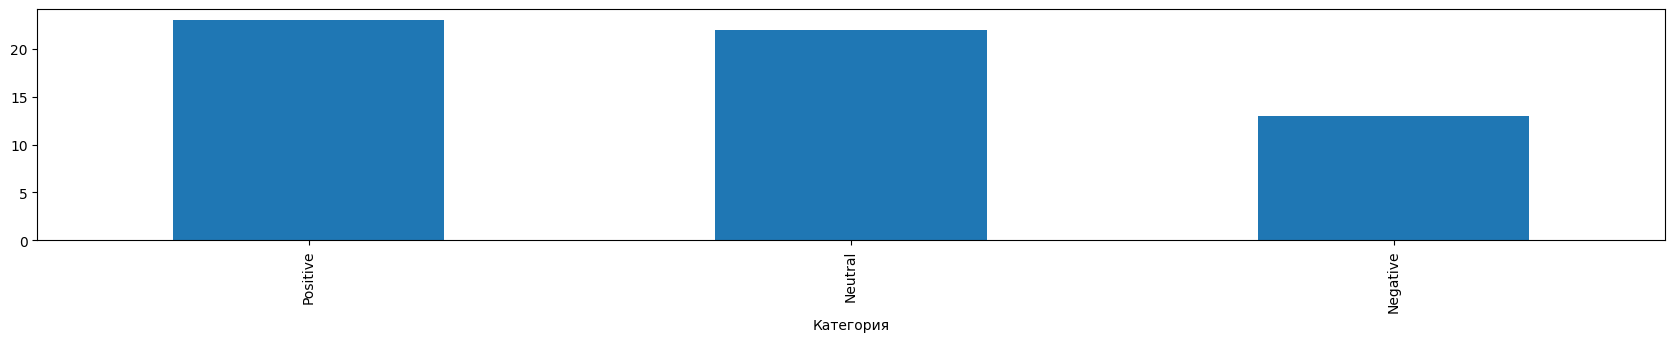

In [400]:
plot_sentiment_bar(news_df, SENTIMENT_MODELS_COLUMNS["FinBERT_sentiment"][1])

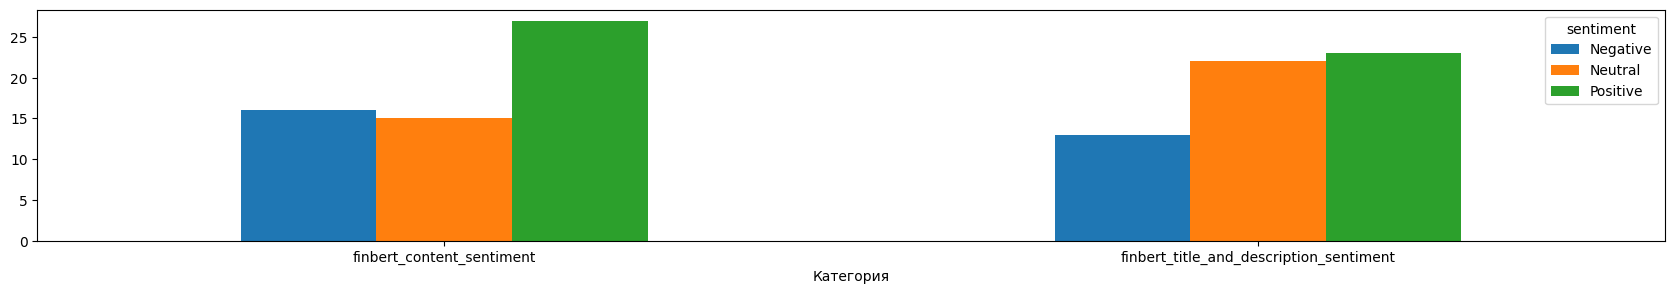

In [401]:
plot_sentiment_bar_for_multiplt_columns(
    news_df,
    SENTIMENT_MODELS_COLUMNS["FinBERT_sentiment"]
)

## Llama-3-8B

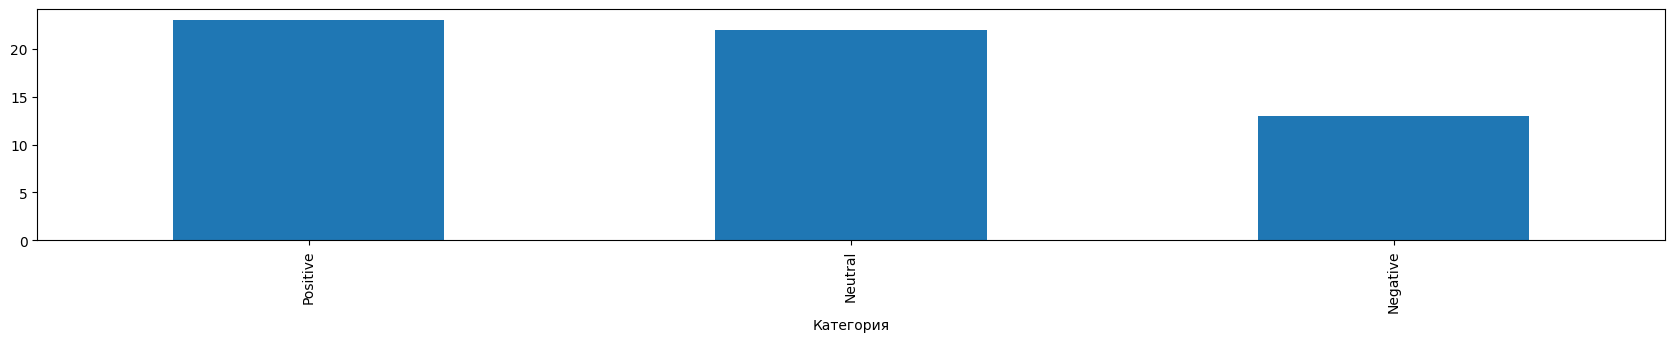

In [402]:
plot_sentiment_bar(news_df, SENTIMENT_MODELS_COLUMNS["Llama-3-8B_sentiment"][0])

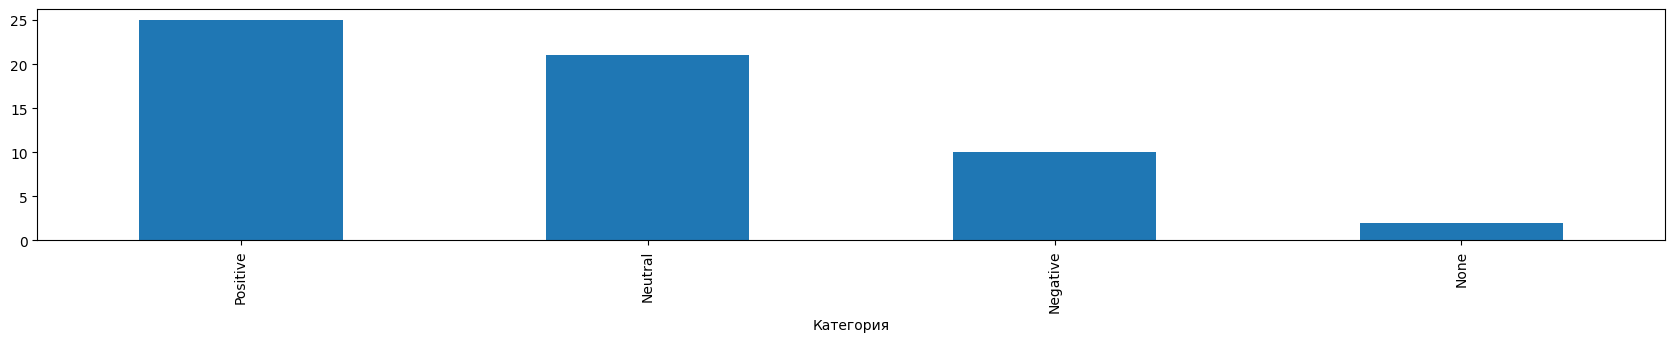

In [403]:
plot_sentiment_bar(news_df, SENTIMENT_MODELS_COLUMNS["Llama-3-8B_sentiment"][1])

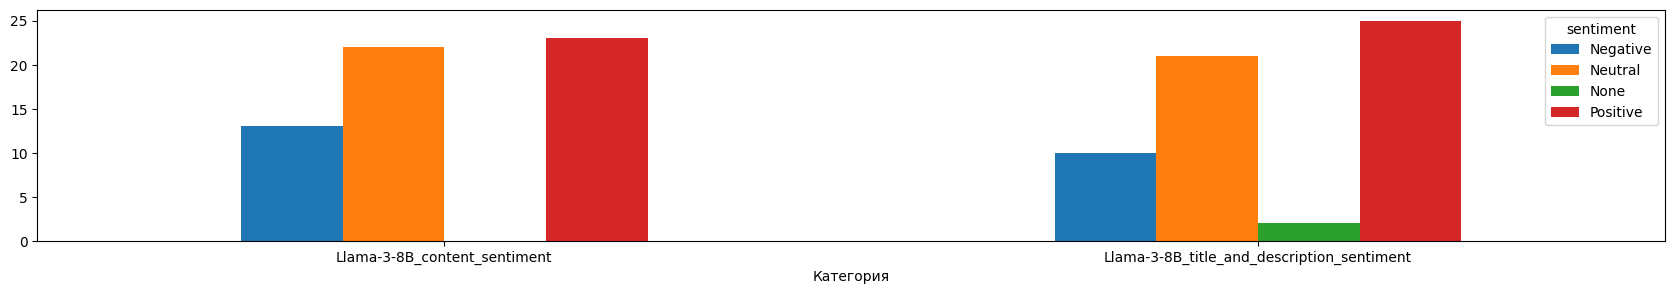

In [404]:
plot_sentiment_bar_for_multiplt_columns(
    news_df,
    SENTIMENT_MODELS_COLUMNS["Llama-3-8B_sentiment"]
)

## Llama-3.2-3B

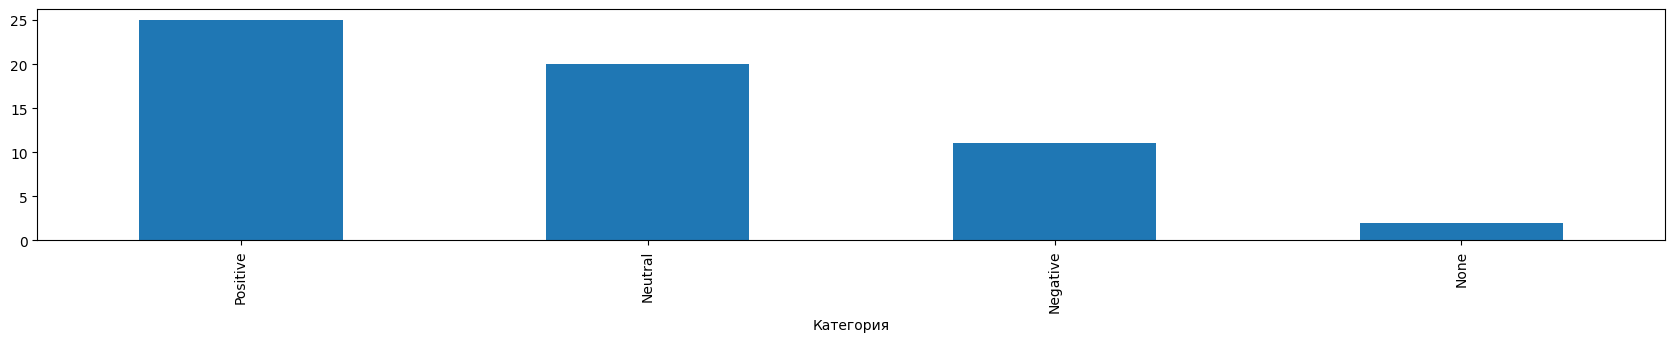

In [405]:
plot_sentiment_bar(news_df, SENTIMENT_MODELS_COLUMNS["Llama-3.2-3B_sentiment"][0])

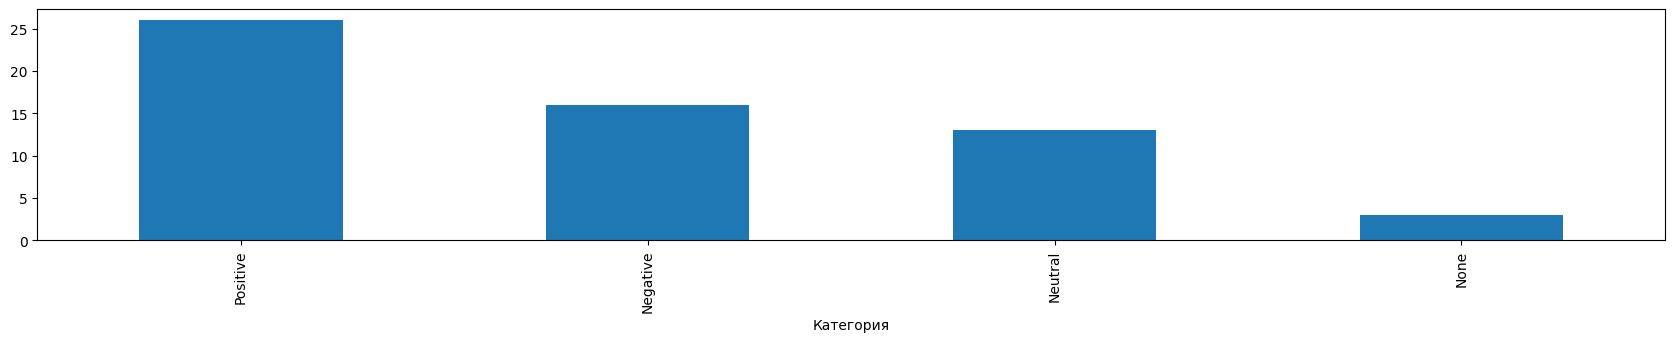

In [406]:
plot_sentiment_bar(news_df, SENTIMENT_MODELS_COLUMNS["Llama-3.2-3B_sentiment"][1])

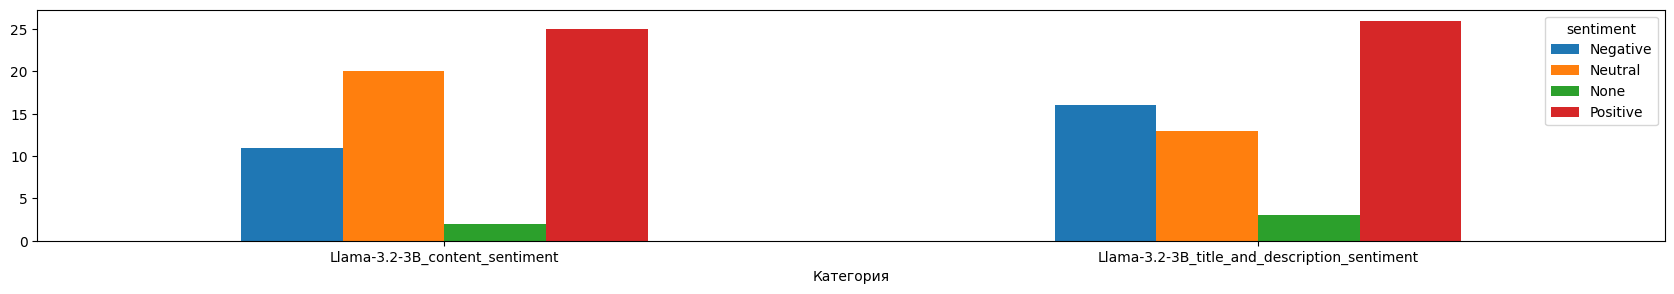

In [407]:
plot_sentiment_bar_for_multiplt_columns(
    news_df,
    SENTIMENT_MODELS_COLUMNS["Llama-3.2-3B_sentiment"]
)

## Phi-3.5-mini

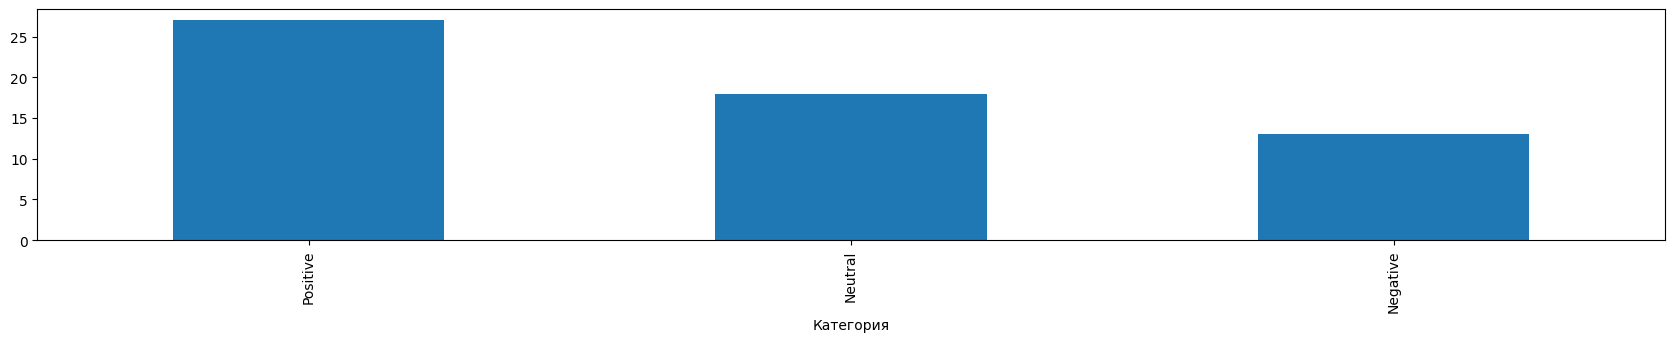

In [408]:
plot_sentiment_bar(news_df, SENTIMENT_MODELS_COLUMNS["Phi-3.5-mini_sentiment"][0])

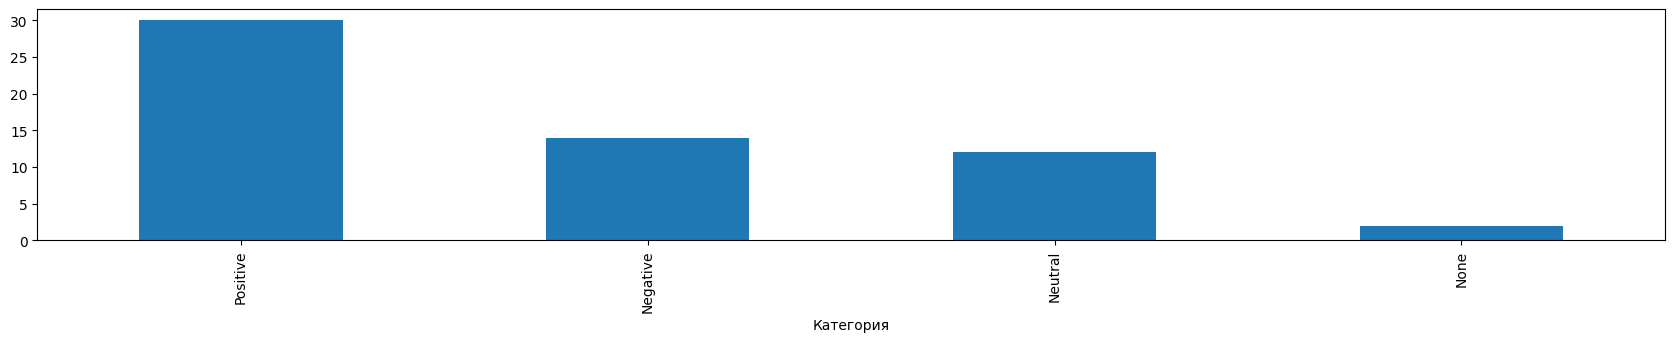

In [409]:
plot_sentiment_bar(news_df, SENTIMENT_MODELS_COLUMNS["Phi-3.5-mini_sentiment"][1])

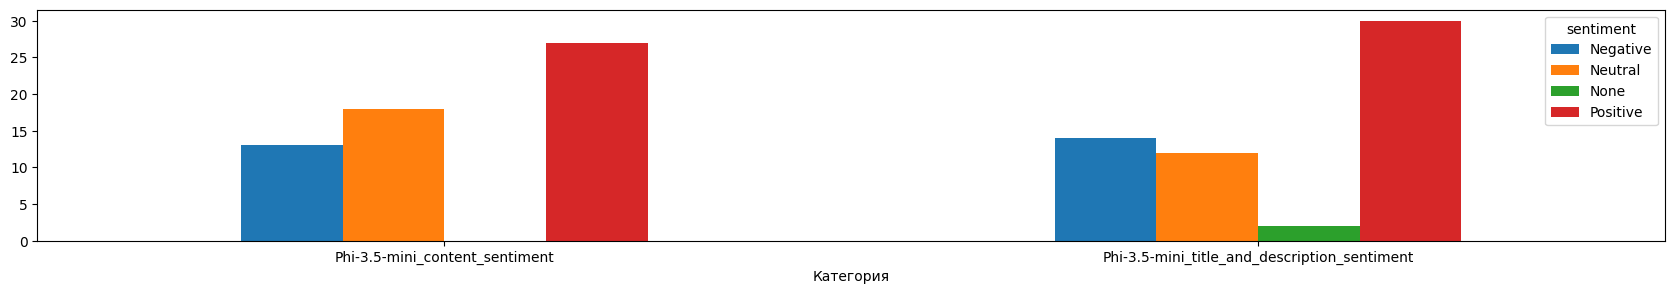

In [410]:
plot_sentiment_bar_for_multiplt_columns(
    news_df,
    SENTIMENT_MODELS_COLUMNS["Phi-3.5-mini_sentiment"]
)

## Mistral-7B-v0.3

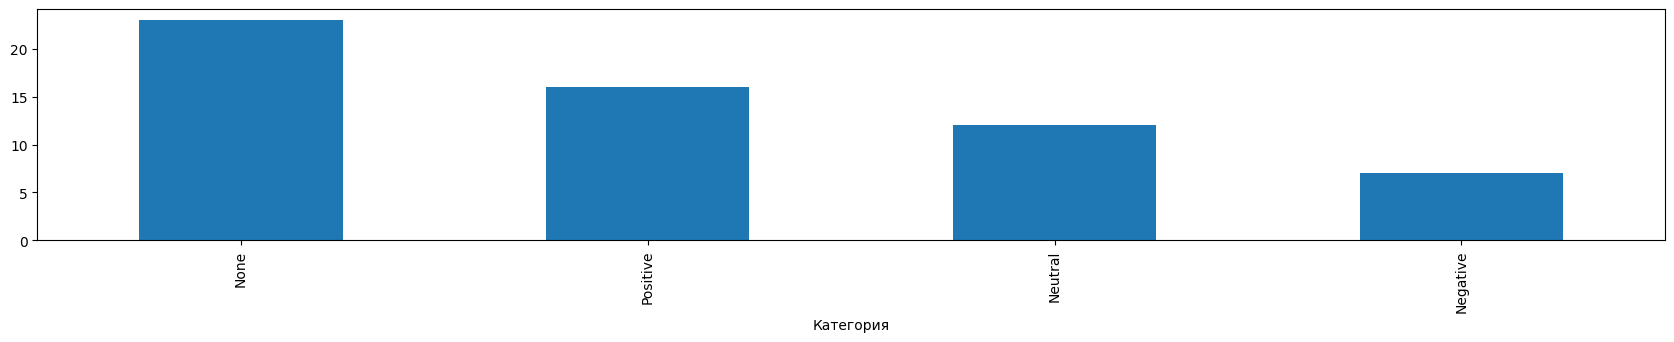

In [411]:
plot_sentiment_bar(news_df, SENTIMENT_MODELS_COLUMNS["Mistral-7B-v0.3_sentiment"][0])

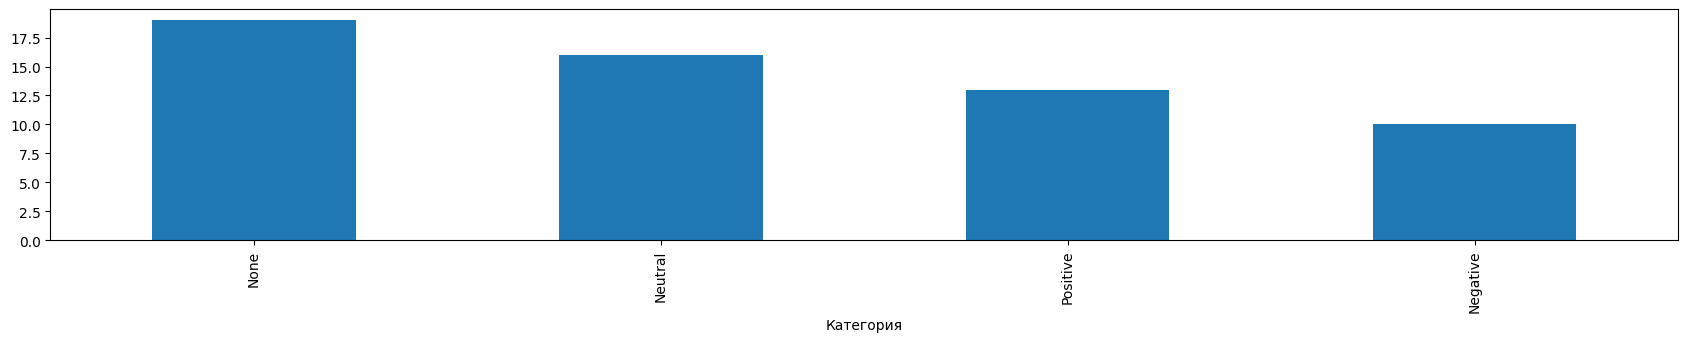

In [412]:
plot_sentiment_bar(news_df, SENTIMENT_MODELS_COLUMNS["Mistral-7B-v0.3_sentiment"][1])

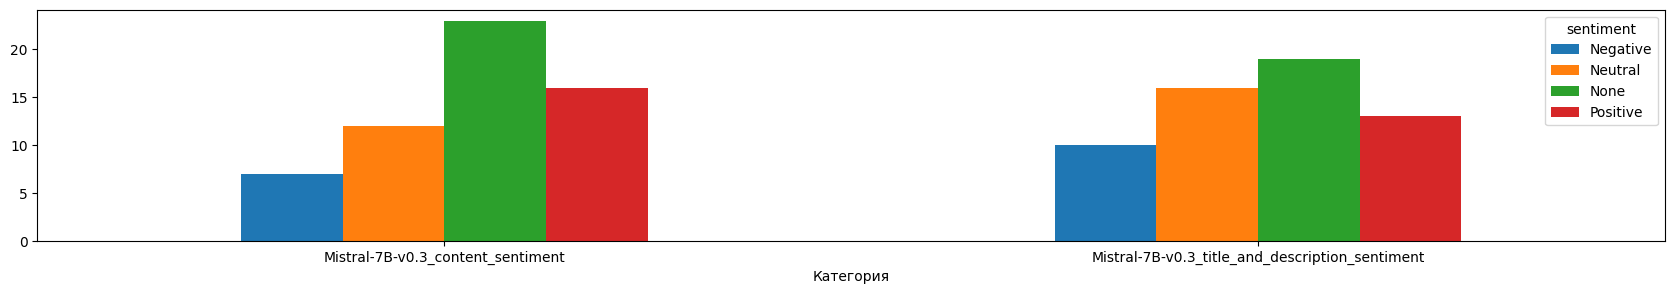

In [413]:
plot_sentiment_bar_for_multiplt_columns(
    news_df,
    SENTIMENT_MODELS_COLUMNS["Mistral-7B-v0.3_sentiment"]
)

## Gemma-2-27b

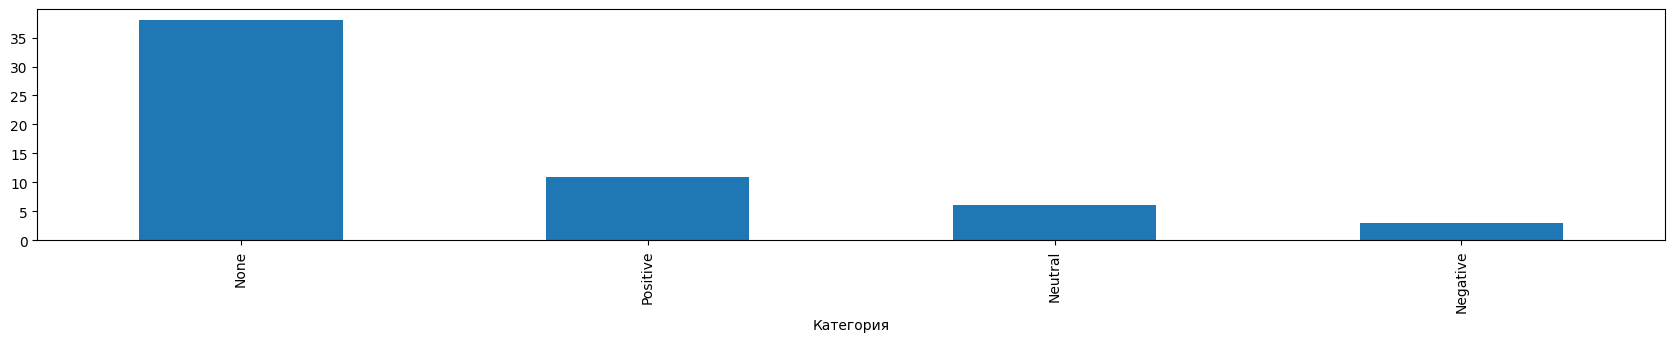

In [414]:
plot_sentiment_bar(news_df, SENTIMENT_MODELS_COLUMNS["Gemma-2-27b_sentiment"][0])

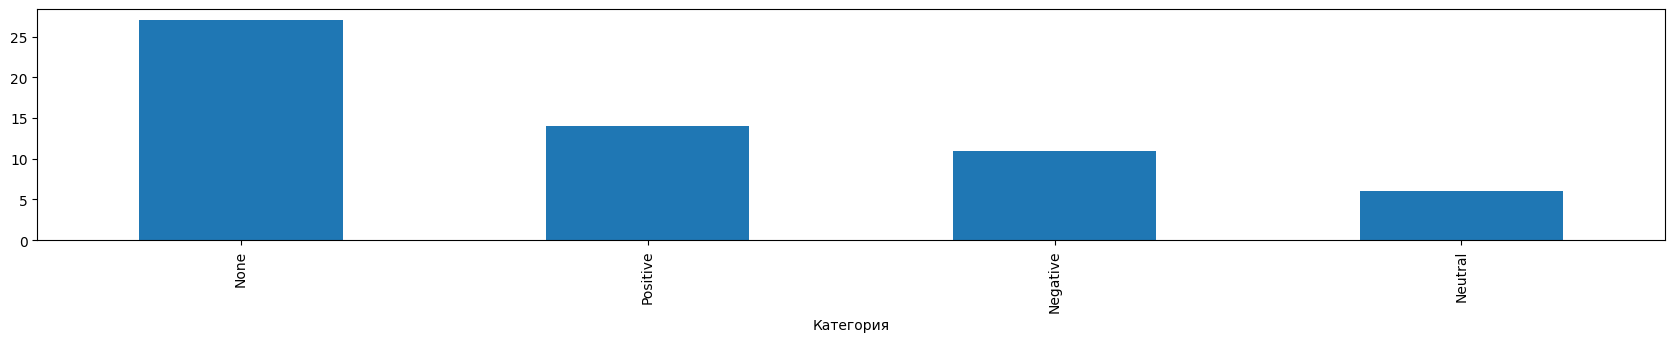

In [415]:
plot_sentiment_bar(news_df, SENTIMENT_MODELS_COLUMNS["Gemma-2-27b_sentiment"][1])

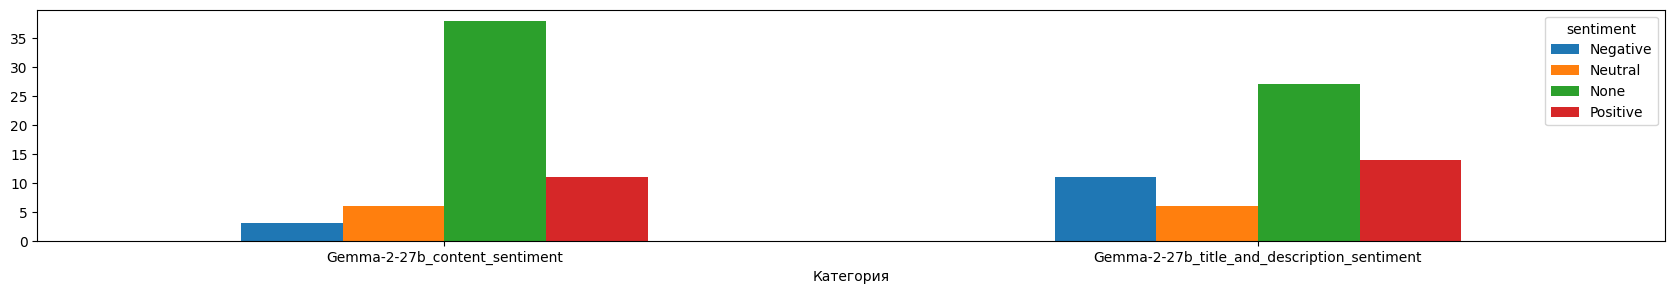

In [416]:
plot_sentiment_bar_for_multiplt_columns(
    news_df,
    SENTIMENT_MODELS_COLUMNS["Gemma-2-27b_sentiment"]
)

## Mistral-8x7B-v0.1

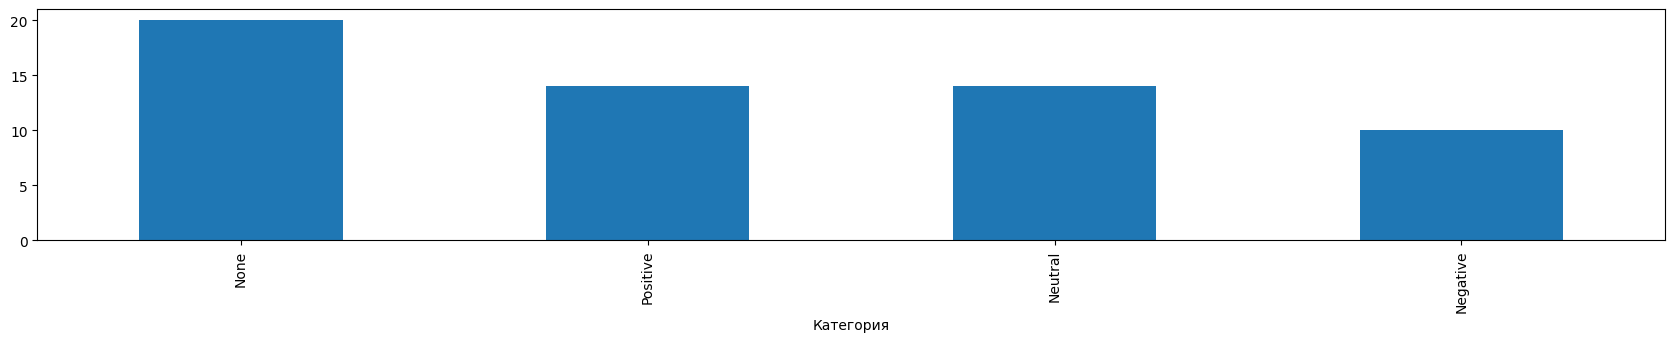

In [417]:
plot_sentiment_bar(news_df, SENTIMENT_MODELS_COLUMNS["Mistral-8x7B-v0.1_sentiment"][0])

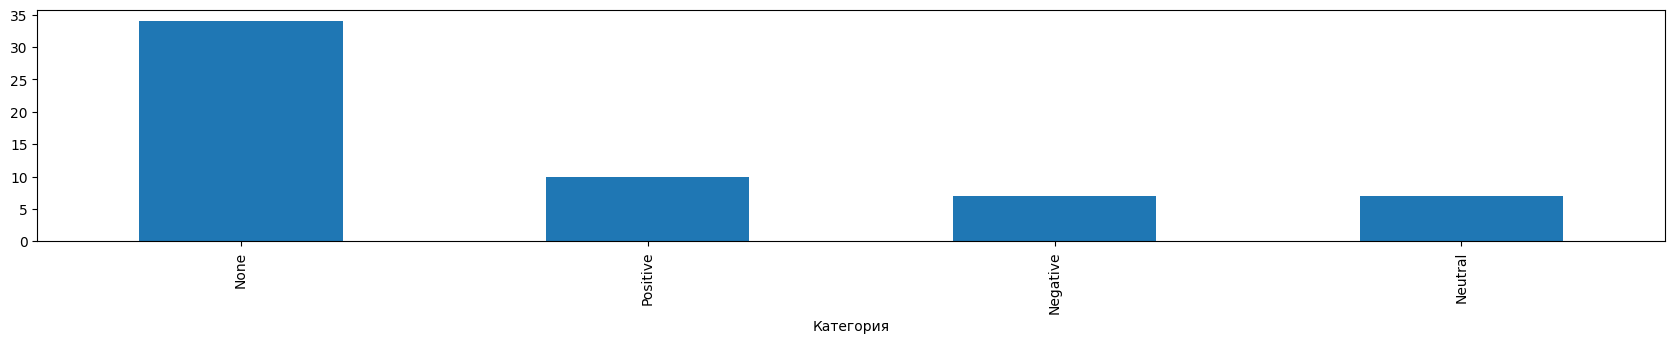

In [418]:
plot_sentiment_bar(news_df, SENTIMENT_MODELS_COLUMNS["Mistral-8x7B-v0.1_sentiment"][1])

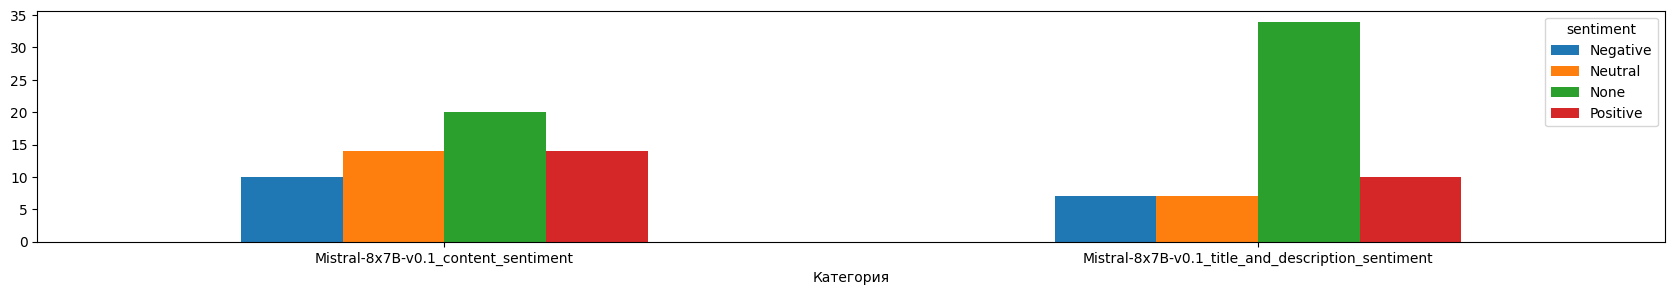

In [419]:
plot_sentiment_bar_for_multiplt_columns(
    news_df,
    SENTIMENT_MODELS_COLUMNS["Mistral-8x7B-v0.1_sentiment"]
)

## Вывод 

Для дальнейшего сохранения выч. ресурсов и ускорения работы, будут взяты только модели: 
* CryptoBERT
* FinBERT
* Llama-3-8B
* Phi-3.5-mini
* Mistral-7B-v0.3

Именно в этих моделях прослеживается минимальное кол-во отсуствующих результатов

# Обработка внешнего датасета с новостями о BTC

https://www.kaggle.com/datasets/oliviervha/crypto-news/data

In [76]:
kaggle_df = pd.read_csv("cryptonews.csv")

In [77]:
kaggle_df = kaggle_df[kaggle_df["subject"] == "bitcoin"].reset_index(drop=True)

In [78]:
# Обрезаем данные для уменьшения вычислительного времен
kaggle_df = kaggle_df.iloc[:500]

In [79]:
kaggle_df.shape

(500, 7)

In [80]:
kaggle_df.head()

,date,sentiment,source,subject,text,title,url
0,2023-12-19 05:25:00,"{'class': 'negative', 'polarity': -0.01, 'subj...",CryptoPotato,bitcoin,Yonsei found that during BTC’s rally in early ...,Is This Why Bitcoin’s Price Rally Was Halted? ...,https://cryptopotato.com/is-this-why-bitcoins-...
1,2023-12-19 04:50:11,"{'class': 'positive', 'polarity': 0.3, 'subjec...",CryptoNews,bitcoin,Cathie Wood led ARK Invest fund sold around 80...,Cathie Wood’s Ark Invest Sells $27.6 Million i...,https://cryptonews.comhttps://cryptonews.com/n...
2,2023-12-19 04:10:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoPotato,bitcoin,Bitcoin's 150% surge pales in comparison to th...,Bitcoin Soared 150% in 2023 But These Companie...,https://cryptopotato.com/bitcoin-soared-150-in...
3,2023-12-19 02:59:59,"{'class': 'negative', 'polarity': -0.08, 'subj...",CoinTelegraph,bitcoin,The SEC has pushed back its decision on a rost...,"SEC delays several Ethereum ETFs, pushing fina...",https://cointelegraph.com/news/sec-delays-ethe...
4,2023-12-18 18:33:34,"{'class': 'negative', 'polarity': -0.27, 'subj...",CoinTelegraph,bitcoin,Bitcoin may remain under pressure for a few da...,"Price analysis 12/18: SPX, DXY, BTC, ETH, BNB,...",https://cointelegraph.com/news/price-analysis-...


In [81]:
kaggle_df["text"][0]

'Yonsei found that during BTC’s rally in early December, the Binary CDD was also active, signaling recent activity by short-term holders.'

In [82]:
kaggle_df["title"][0]

'Is This Why Bitcoin’s Price Rally Was Halted? (CryptoQuant)'

In [83]:
kaggle_df.loc[idx, "text"]

'The digital asset market recorded positive developments throughout the year with significant institutional entries to the market in Q4 2023 as asset prices continue on an upward trajectory.'

In [84]:
kaggle_df["cryptobert_embedding"] = pd.Series([[] for _ in range(len(kaggle_df))], dtype=object)

kaggle_df["cryptobert_content_sentiment"] = ""
kaggle_df["cryptobert_content_score"] = np.nan
kaggle_df["cryptobert_title_and_description_sentiment"] = ""
kaggle_df["cryptobert_title_and_description_score"] = np.nan

kaggle_df["finbert_content_sentiment"] = ""
kaggle_df["finbert_content_score"] = np.nan
kaggle_df["finbert_title_and_description_sentiment"] = ""
kaggle_df["finbert_title_and_description_score"] = np.nan

kaggle_df["Llama-3-8B_content_sentiment"] = ""
kaggle_df["Llama-3-8B_content_score"] = np.nan
kaggle_df["Llama-3-8B_title_and_description_sentiment"] = ""
kaggle_df["Llama-3-8B_title_and_description_score"] = np.nan

kaggle_df["Phi-3.5-mini_content_sentiment"] = ""
kaggle_df["Phi-3.5-mini_content_score"] = np.nan
kaggle_df["Phi-3.5-mini_title_and_description_sentiment"] = ""
kaggle_df["Phi-3.5-mini_title_and_description_score"] = np.nan

kaggle_df["Mistral-7B-v0.3_content_sentiment"] = ""
kaggle_df["Mistral-7B-v0.3_content_score"] = np.nan
kaggle_df["Mistral-7B-v0.3_title_and_description_sentiment"] = ""
kaggle_df["Mistral-7B-v0.3_title_and_description_score"] = np.nan

In [85]:
kaggle_df.columns

Index(['date', 'sentiment', 'source', 'subject', 'text', 'title', 'url',
       'cryptobert_embedding', 'cryptobert_content_sentiment',
       'cryptobert_content_score',
       'cryptobert_title_and_description_sentiment',
       'cryptobert_title_and_description_score', 'finbert_content_sentiment',
       'finbert_content_score', 'finbert_title_and_description_sentiment',
       'finbert_title_and_description_score', 'Llama-3-8B_content_sentiment',
       'Llama-3-8B_content_score',
       'Llama-3-8B_title_and_description_sentiment',
       'Llama-3-8B_title_and_description_score',
       'Phi-3.5-mini_content_sentiment', 'Phi-3.5-mini_content_score',
       'Phi-3.5-mini_title_and_description_sentiment',
       'Phi-3.5-mini_title_and_description_score',
       'Mistral-7B-v0.3_content_sentiment', 'Mistral-7B-v0.3_content_score',
       'Mistral-7B-v0.3_title_and_description_sentiment',
       'Mistral-7B-v0.3_title_and_description_score'],
      dtype='object')

In [ ]:
embeddings = []

for idx in tqdm.tqdm(range(kaggle_df.shape[0])): 
    embeddings += [cryptobert_sentiment_embedding_calculate(kaggle_df.loc[idx, "title"]).tolist()]
    
    cryptobert_content = cryptobert_sentiment_calculate(kaggle_df.loc[idx, "text"])[0]
    cryptobert_title_and_description = cryptobert_sentiment_calculate(kaggle_df.loc[idx, "title"])[0]
    kaggle_df.loc[idx, "cryptobert_content_sentiment"] = cryptobert_content['label']
    kaggle_df.loc[idx, "cryptobert_content_score"] = cryptobert_content['score']
    kaggle_df.loc[idx, "cryptobert_title_and_description_sentiment"] = cryptobert_title_and_description['label']
    kaggle_df.loc[idx, "cryptobert_title_and_description_score"] = cryptobert_title_and_description['score']

    finbert_content = finbert_sentiment_calculate(kaggle_df.loc[idx, "text"])[0]
    finbert_title_and_description = finbert_sentiment_calculate(kaggle_df.loc[idx, "title"])[0]
    kaggle_df.loc[idx, "finbert_content_sentiment"] = finbert_content['label']
    kaggle_df.loc[idx, "finbert_content_score"] = finbert_content['score']
    kaggle_df.loc[idx, "finbert_title_and_description_sentiment"] = finbert_title_and_description['label']
    kaggle_df.loc[idx, "finbert_title_and_description_score"] = finbert_title_and_description['score']

    llama_3_8B_content = llm_huggingface_sentiment_calculate(kaggle_df.loc[idx, "text"], HUGGINGFACE_MODELS[0])[0]
    llama_3_8B_title_and_description = llm_huggingface_sentiment_calculate(kaggle_df.loc[idx, "title"], HUGGINGFACE_MODELS[0])[0]
    kaggle_df.loc[idx, "Llama-3-8B_content_sentiment"] = llama_3_8B_content['label']
    kaggle_df.loc[idx, "Llama-3-8B_content_score"] = llama_3_8B_content['score']
    kaggle_df.loc[idx, "Llama-3-8B_title_and_description_sentiment"] = llama_3_8B_title_and_description['label']
    kaggle_df.loc[idx, "Llama-3-8B_title_and_description_score"] = llama_3_8B_title_and_description['score']

    phi_3_5_mini_content = llm_huggingface_sentiment_calculate(kaggle_df.loc[idx, "text"], HUGGINGFACE_MODELS[2])[0]
    phi_3_5_mini_title_and_description = llm_huggingface_sentiment_calculate(kaggle_df.loc[idx, "title"], HUGGINGFACE_MODELS[2])[0]
    kaggle_df.loc[idx, "Phi-3.5-mini_content_sentiment"] = phi_3_5_mini_content['label']
    kaggle_df.loc[idx, "Phi-3.5-mini_content_score"] = phi_3_5_mini_content['score']
    kaggle_df.loc[idx, "Phi-3.5-mini_title_and_description_sentiment"] = phi_3_5_mini_title_and_description['label']
    kaggle_df.loc[idx, "Phi-3.5-mini_title_and_description_score"] = phi_3_5_mini_title_and_description['score']

    mistral_7B_v0_3_content = llm_huggingface_sentiment_calculate(kaggle_df.loc[idx, "text"], HUGGINGFACE_MODELS[3])[0]
    mistral_7B_v0_3_title_and_description = llm_huggingface_sentiment_calculate(kaggle_df.loc[idx, "title"], HUGGINGFACE_MODELS[3])[0]
    kaggle_df.loc[idx, "Mistral-7B-v0.3_content_sentiment"] = mistral_7B_v0_3_content['label']
    kaggle_df.loc[idx, "Mistral-7B-v0.3_content_score"] = mistral_7B_v0_3_content['score']
    kaggle_df.loc[idx, "Mistral-7B-v0.3_title_and_description_sentiment"] = mistral_7B_v0_3_title_and_description['label']
    kaggle_df.loc[idx, "Mistral-7B-v0.3_title_and_description_score"] = mistral_7B_v0_3_title_and_description['score']

kaggle_df["cryptobert_embedding"] = embeddings

clear_output()

In [97]:
kaggle_df.shape

(500, 28)

In [98]:
kaggle_df.head()

,date,sentiment,source,subject,text,title,url,cryptobert_embedding,cryptobert_content_sentiment,cryptobert_content_score,...,Llama-3-8B_title_and_description_sentiment,Llama-3-8B_title_and_description_score,Phi-3.5-mini_content_sentiment,Phi-3.5-mini_content_score,Phi-3.5-mini_title_and_description_sentiment,Phi-3.5-mini_title_and_description_score,Mistral-7B-v0.3_content_sentiment,Mistral-7B-v0.3_content_score,Mistral-7B-v0.3_title_and_description_sentiment,Mistral-7B-v0.3_title_and_description_score
0,2023-12-19 05:25:00,"{'class': 'negative', 'polarity': -0.01, 'subj...",CryptoPotato,bitcoin,Yonsei found that during BTC’s rally in early ...,Is This Why Bitcoin’s Price Rally Was Halted? ...,https://cryptopotato.com/is-this-why-bitcoins-...,"[-0.1452634036540985, 0.4085088074207306, 0.79...",Negative,0.685094,...,None,0.0,Neutral,0.75,Neutral,0.65,None,0.0,None,0.0
1,2023-12-19 04:50:11,"{'class': 'positive', 'polarity': 0.3, 'subjec...",CryptoNews,bitcoin,Cathie Wood led ARK Invest fund sold around 80...,Cathie Wood’s Ark Invest Sells $27.6 Million i...,https://cryptonews.comhttps://cryptonews.com/n...,"[-0.8073985576629639, 0.048012565821409225, 0....",Neutral,0.796176,...,None,0.0,Neutral,0.70,Neutral,0.60,None,0.0,None,0.0
2,2023-12-19 04:10:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoPotato,bitcoin,Bitcoin's 150% surge pales in comparison to th...,Bitcoin Soared 150% in 2023 But These Companie...,https://cryptopotato.com/bitcoin-soared-150-in...,"[-0.2684962749481201, -0.506695568561554, 0.35...",Positive,0.638466,...,None,0.0,Positive,0.95,Positive,0.95,None,0.0,None,0.0
3,2023-12-19 02:59:59,"{'class': 'negative', 'polarity': -0.08, 'subj...",CoinTelegraph,bitcoin,The SEC has pushed back its decision on a rost...,"SEC delays several Ethereum ETFs, pushing fina...",https://cointelegraph.com/news/sec-delays-ethe...,"[-0.012931852601468563, 0.651164710521698, 0.5...",Neutral,0.702500,...,None,0.0,Neutral,0.70,Neutral,0.70,None,0.0,None,0.0
4,2023-12-18 18:33:34,"{'class': 'negative', 'polarity': -0.27, 'subj...",CoinTelegraph,bitcoin,Bitcoin may remain under pressure for a few da...,"Price analysis 12/18: SPX, DXY, BTC, ETH, BNB,...",https://cointelegraph.com/news/price-analysis-...,"[-0.22273632884025574, 0.6594018340110779, 0.3...",Neutral,0.632399,...,Neutral,0.9,Positive,0.75,Neutral,0.70,None,0.0,None,0.0


## Сохранение результатов

In [87]:
kaggle_df.to_json("kaggle_df.json")

# Создание датасетов для записи данных

Здесь будут созданы датасет, который изначально будет записан в БД, а другой датасет будет имитировать работу инкрементной записи AirFlow

In [88]:
df_1 = pd.read_json("news_df.json")
df_2 = pd.read_json("kaggle_df.json")

In [126]:
result_df = pd.DataFrame(
    columns=[
        'published_at', 'source', 'cryptobert_embedding',
        
        'cryptobert_content_sentiment',
        'cryptobert_content_score',
        'cryptobert_title_and_description_sentiment',
        'cryptobert_title_and_description_score', 
        
        'finbert_content_sentiment',
        'finbert_content_score', 
        'finbert_title_and_description_sentiment',
        'finbert_title_and_description_score',
        
        'Llama-3-8B_content_sentiment',
        'Llama-3-8B_content_score',
        'Llama-3-8B_title_and_description_sentiment',
        'Llama-3-8B_title_and_description_score',
        
        'Phi-3.5-mini_content_sentiment', 
        'Phi-3.5-mini_content_score',
        'Phi-3.5-mini_title_and_description_sentiment',
        'Phi-3.5-mini_title_and_description_score',
        
        'Mistral-7B-v0.3_content_sentiment', 
        'Mistral-7B-v0.3_content_score',
        'Mistral-7B-v0.3_title_and_description_sentiment',
        'Mistral-7B-v0.3_title_and_description_score'
    ]
)

In [103]:
df_2 = df_2.rename(columns={'date': 'published_at'})

In [131]:
for idx in range(df_1.shape[0]):
    result_df = pd.concat([result_df, df_1.iloc[idx][result_df.columns].to_frame().T])

In [133]:
for idx in range(df_2.shape[0]):
    result_df = pd.concat([result_df, df_2.iloc[idx][result_df.columns].to_frame().T])

In [134]:
result_df = result_df.reset_index(drop=True)

In [135]:
result_df.shape

(555, 23)

In [136]:
result_df.head()

,published_at,source,cryptobert_embedding,cryptobert_content_sentiment,cryptobert_content_score,cryptobert_title_and_description_sentiment,cryptobert_title_and_description_score,finbert_content_sentiment,finbert_content_score,finbert_title_and_description_sentiment,...,Llama-3-8B_title_and_description_sentiment,Llama-3-8B_title_and_description_score,Phi-3.5-mini_content_sentiment,Phi-3.5-mini_content_score,Phi-3.5-mini_title_and_description_sentiment,Phi-3.5-mini_title_and_description_score,Mistral-7B-v0.3_content_sentiment,Mistral-7B-v0.3_content_score,Mistral-7B-v0.3_title_and_description_sentiment,Mistral-7B-v0.3_title_and_description_score
0,2024-10-04 20:10:21+00:00,Business Insider,"[0.22408461570000002, -0.45151036980000003, 0....",Neutral,0.636737,Positive,0.668114,Positive,0.999421,Positive,...,Positive,0.8,Positive,0.9,Positive,0.95,None,0.0,None,0.0
1,2024-10-04 13:42:52+00:00,Business Insider,"[0.5452716351, -0.5789197087, -0.0811856017, 0...",Neutral,0.512202,Positive,0.608803,Positive,1.0,Positive,...,Positive,0.7,Positive,0.95,Positive,0.85,None,0.0,None,0.0
2,2024-10-03 20:11:36+00:00,Business Insider,"[0.4440334141, -0.3558115363, 1.0342404842, 0....",Neutral,0.696073,Neutral,0.903526,Negative,0.987458,Negative,...,Negative,0.8,Negative,0.85,Negative,0.85,None,0.0,None,0.0
3,2024-10-03 19:32:35+00:00,The Verge,"[0.46444684270000003, -0.6201056838, 0.1298819...",Positive,0.746908,Positive,0.66295,Neutral,0.999903,Neutral,...,Positive,0.9,Positive,0.75,Positive,0.9,None,0.0,None,0.0
4,2024-10-03 13:37:41+00:00,Business Insider,"[0.5597029328, -0.253352344, 1.1046607494, 0.8...",Positive,0.498512,Neutral,0.614407,Positive,0.861552,Negative,...,Negative,0.7,Negative,0.85,Negative,0.85,None,0.0,None,0.0


In [153]:
df_save = result_df[:-20]

In [154]:
df_save.shape

(535, 23)

In [157]:
df_test = kaggle_df.iloc[-20:][["date", "source", "subject", "text", "title"]]
df_test = df_test.rename(columns={'date': 'published_at'})
df_test = df_test.reset_index(drop=True)

In [158]:
df_test.shape

(20, 5)

In [159]:
df_test.head()

,published_at,source,subject,text,title
0,2023-11-22 20:13:53,CryptoNews,bitcoin,Blackrock held a meeting with the U.S. Securit...,Analyst: BlackRock is Holding Meetings With th...
1,2023-11-22 20:00:09,CoinTelegraph,bitcoin,The creator of the Mutant Ape Planet NFT colle...,"MAYC ripoff creator pleads guilty, G2A opens N..."
2,2023-11-22 19:47:00,CryptoPotato,bitcoin,The SEC met with Grayscale Investments to comp...,Grayscale Investments Meets with SEC to Discus...
3,2023-11-22 19:44:48,CoinTelegraph,bitcoin,BTC futures and options held firm despite a wa...,Bitcoin derivatives traders target $40K BTC pr...
4,2023-11-22 19:10:00,CryptoPotato,bitcoin,The New York Stock Exchange's former leader is...,Money Will Flood Into Bitcoin When An ETF Is A...


# Сохранение данных в Qdrant

In [1]:
from qdrant_client import QdrantClient, models
from qdrant_client.http.api_client import UnexpectedResponse

## Создание коллекции для записи

In [2]:
q_client = QdrantClient(url="http://qdrant:6333", timeout=300)

In [177]:
try:
    q_client.create_collection(
        collection_name="btc_news",
        vectors_config={
            "cryptobert_embedding": models.VectorParams(size=768, distance=models.Distance.COSINE, on_disk=True),
        },
        replication_factor=1,
        on_disk_payload=True,  # Храним payload на диске
        hnsw_config=models.HnswConfigDiff(
            ef_construct=128,
            m=32,
        ),
        quantization_config=models.ScalarQuantization(
            scalar=models.ScalarQuantizationConfig(
                type=models.ScalarType.INT8,
                quantile=1.0, # Все данные будут сохранятся в квантизированном HNSW индексе
                always_ram=False
            )
        )
    )
except UnexpectedResponse as error:
    print("Такая коллекция уже существует")

Такая коллекция уже существует


## Запись части данных в коллекцию

In [152]:
for idx in tqdm.tqdm(range(0, df_save.shape[0])):
    q_client.upsert(
        collection_name="btc_news",
        points=[
            models.PointStruct(
                id=idx,
                payload={
                    'published_at': df_save.loc[idx, "published_at"],
                    'source': df_save.loc[idx, "source"],
                    
                    'CryptoBERT_content_sentiment': df_save.loc[idx, "cryptobert_content_sentiment"],
                    'CryptoBERT_content_score': float(df_save.loc[idx, "cryptobert_content_score"]),
                    'CryptoBERT_title_and_description_sentiment': df_save.loc[idx, "cryptobert_title_and_description_sentiment"],
                    'CryptoBERT_title_and_description_score': float(df_save.loc[idx, "cryptobert_title_and_description_score"]),
                    
                    'FinBERT_content_sentiment': df_save.loc[idx, "finbert_content_sentiment"],
                    'FinBERT_content_score': float(df_save.loc[idx, "finbert_content_score"]),
                    'FinBERT_title_and_description_sentiment': df_save.loc[idx, "finbert_title_and_description_sentiment"],
                    'FinBERT_title_and_description_score': float(df_save.loc[idx, "finbert_title_and_description_score"]),
                    
                    'Llama-3-8B_content_sentiment': df_save.loc[idx, "Llama-3-8B_content_sentiment"],
                    'Llama-3-8B_content_score': float(df_save.loc[idx, "Llama-3-8B_content_score"]),
                    'Llama-3-8B_title_and_description_sentiment': df_save.loc[idx, "Llama-3-8B_title_and_description_sentiment"],
                    'Llama-3-8B_title_and_description_score': float(df_save.loc[idx, "Llama-3-8B_title_and_description_score"]),
                    
                    'Phi-3.5-mini_content_sentiment': df_save.loc[idx, "Phi-3.5-mini_content_sentiment"], 
                    'Phi-3.5-mini_content_score': float(df_save.loc[idx, "Phi-3.5-mini_content_score"]),
                    'Phi-3.5-mini_title_and_description_sentiment': df_save.loc[idx, "Phi-3.5-mini_title_and_description_sentiment"],
                    'Phi-3.5-mini_title_and_description_score': float(df_save.loc[idx, "Phi-3.5-mini_title_and_description_score"]),
                    
                    'Mistral-7B-v0.3_content_sentiment': df_save.loc[idx, "Mistral-7B-v0.3_content_sentiment"], 
                    'Mistral-7B-v0.3_content_score': float(df_save.loc[idx, "Mistral-7B-v0.3_content_score"]),
                    'Mistral-7B-v0.3_title_and_description_sentiment': df_save.loc[idx, "Mistral-7B-v0.3_title_and_description_sentiment"],
                    'Mistral-7B-v0.3_title_and_description_score': float(df_save.loc[idx, "Mistral-7B-v0.3_title_and_description_score"]),
                },
                vector={
                    "cryptobert_embedding": np.array(df_save.loc[idx, "cryptobert_embedding"]).tolist(),
                }
            ),
        ],
        wait=False
    )

100%|██████████| 535/535 [00:02<00:00, 221.45it/s]


## Имитация инкрементальной записи

Намеренный отход от DRY, чтобы максимально подробно описать, что происходит

In [187]:
for idx in tqdm.tqdm(range(df_test.shape[0])):
    # Полученные данные с API
    news_series = df_test.iloc[idx].copy()
    
    # Добавление новых колонок
    news_series["cryptobert_embedding"] = []

    news_series["cryptobert_content_sentiment"] = ""
    news_series["cryptobert_content_score"] = np.nan
    news_series["cryptobert_title_and_description_sentiment"] = ""
    news_series["cryptobert_title_and_description_score"] = np.nan
    
    news_series["finbert_content_sentiment"] = ""
    news_series["finbert_content_score"] = np.nan
    news_series["finbert_title_and_description_sentiment"] = ""
    news_series["finbert_title_and_description_score"] = np.nan
    
    news_series["Llama-3-8B_content_sentiment"] = ""
    news_series["Llama-3-8B_content_score"] = np.nan
    news_series["Llama-3-8B_title_and_description_sentiment"] = ""
    news_series["Llama-3-8B_title_and_description_score"] = np.nan
    
    news_series["Phi-3.5-mini_content_sentiment"] = ""
    news_series["Phi-3.5-mini_content_score"] = np.nan
    news_series["Phi-3.5-mini_title_and_description_sentiment"] = ""
    news_series["Phi-3.5-mini_title_and_description_score"] = np.nan
    
    news_series["Mistral-7B-v0.3_content_sentiment"] = ""
    news_series["Mistral-7B-v0.3_content_score"] = np.nan
    news_series["Mistral-7B-v0.3_title_and_description_sentiment"] = ""
    news_series["Mistral-7B-v0.3_title_and_description_score"] = np.nan

    
    # Основные расчёты
    ## Расчёт эмбеддингов
    news_series["cryptobert_embedding"] = cryptobert_sentiment_embedding_calculate(news_series["title"]).tolist()

    ## CryptoBERT
    cryptobert_content = cryptobert_sentiment_calculate(news_series["text"])[0]
    cryptobert_title_and_description = cryptobert_sentiment_calculate(news_series["title"])[0]
    news_series["cryptobert_content_sentiment"] = cryptobert_content['label']
    news_series["cryptobert_content_score"] = cryptobert_content['score']
    news_series["cryptobert_title_and_description_sentiment"] = cryptobert_title_and_description['label']
    news_series["cryptobert_title_and_description_score"] = cryptobert_title_and_description['score']

    ## FinBERT
    finbert_content = finbert_sentiment_calculate(news_series["text"])[0]
    finbert_title_and_description = finbert_sentiment_calculate(news_series["title"])[0]
    news_series["finbert_content_sentiment"] = finbert_content['label']
    news_series["finbert_content_score"] = finbert_content['score']
    news_series["finbert_title_and_description_sentiment"] = finbert_title_and_description['label']
    news_series["finbert_title_and_description_score"] = finbert_title_and_description['score']
    
    ## Llama-3-8B 
    llama_3_8B_content = llm_huggingface_sentiment_calculate(news_series["text"], HUGGINGFACE_MODELS[0])[0]
    llama_3_8B_title_and_description = llm_huggingface_sentiment_calculate(news_series["title"], HUGGINGFACE_MODELS[0])[0]
    news_series["Llama-3-8B_content_sentiment"] = llama_3_8B_content['label']
    news_series["Llama-3-8B_content_score"] = llama_3_8B_content['score']
    news_series["Llama-3-8B_title_and_description_sentiment"] = llama_3_8B_title_and_description['label']
    news_series["Llama-3-8B_title_and_description_score"] = llama_3_8B_title_and_description['score']

    ## Phi-3.5-mini
    phi_3_5_mini_content = llm_huggingface_sentiment_calculate(news_series["text"], HUGGINGFACE_MODELS[2])[0]
    phi_3_5_mini_title_and_description = llm_huggingface_sentiment_calculate(news_series["title"], HUGGINGFACE_MODELS[2])[0]
    news_series["Phi-3.5-mini_content_sentiment"] = phi_3_5_mini_content['label']
    news_series["Phi-3.5-mini_content_score"] = phi_3_5_mini_content['score']
    news_series["Phi-3.5-mini_title_and_description_sentiment"] = phi_3_5_mini_title_and_description['label']
    news_series["Phi-3.5-mini_title_and_description_score"] = phi_3_5_mini_title_and_description['score']

    ## Mistral-7B-v0.3
    mistral_7B_v0_3_content = llm_huggingface_sentiment_calculate(news_series["text"], HUGGINGFACE_MODELS[3])[0]
    mistral_7B_v0_3_title_and_description = llm_huggingface_sentiment_calculate(news_series["title"], HUGGINGFACE_MODELS[3])[0]
    news_series["Mistral-7B-v0.3_content_sentiment"] = mistral_7B_v0_3_content['label']
    news_series["Mistral-7B-v0.3_content_score"] = mistral_7B_v0_3_content['score']
    news_series["Mistral-7B-v0.3_title_and_description_sentiment"] = mistral_7B_v0_3_title_and_description['label']
    news_series["Mistral-7B-v0.3_title_and_description_score"] = mistral_7B_v0_3_title_and_description['score']


    # Сохранение результатов в Qdrant
    q_client.upsert(
        collection_name="btc_news",
        points=[
            models.PointStruct(
                id=idx,
                payload={
                    'published_at': news_series["published_at"],
                    'source': news_series["source"],
                    
                    'CryptoBERT_content_sentiment': news_series["cryptobert_content_sentiment"],
                    'CryptoBERT_content_score': float(news_series["cryptobert_content_score"]),
                    'CryptoBERT_title_and_description_sentiment': news_series["cryptobert_title_and_description_sentiment"],
                    'CryptoBERT_title_and_description_score': float(news_series["cryptobert_title_and_description_score"]),
                    
                    'FinBERT_content_sentiment': news_series["finbert_content_sentiment"],
                    'FinBERT_content_score': float(news_series["finbert_content_score"]),
                    'FinBERT_title_and_description_sentiment': news_series["finbert_title_and_description_sentiment"],
                    'FinBERT_title_and_description_score': float(news_series["finbert_title_and_description_score"]),
                    
                    'Llama-3-8B_content_sentiment': news_series["Llama-3-8B_content_sentiment"],
                    'Llama-3-8B_content_score': float(news_series["Llama-3-8B_content_score"]),
                    'Llama-3-8B_title_and_description_sentiment': news_series["Llama-3-8B_title_and_description_sentiment"],
                    'Llama-3-8B_title_and_description_score': float(news_series["Llama-3-8B_title_and_description_score"]),
                    
                    'Phi-3.5-mini_content_sentiment': news_series["Phi-3.5-mini_content_sentiment"], 
                    'Phi-3.5-mini_content_score': float(news_series["Phi-3.5-mini_content_score"]),
                    'Phi-3.5-mini_title_and_description_sentiment': news_series["Phi-3.5-mini_title_and_description_sentiment"],
                    'Phi-3.5-mini_title_and_description_score': float(news_series["Phi-3.5-mini_title_and_description_score"]),
                    
                    'Mistral-7B-v0.3_content_sentiment': news_series["Mistral-7B-v0.3_content_sentiment"], 
                    'Mistral-7B-v0.3_content_score': float(news_series["Mistral-7B-v0.3_content_score"]),
                    'Mistral-7B-v0.3_title_and_description_sentiment': news_series["Mistral-7B-v0.3_title_and_description_sentiment"],
                    'Mistral-7B-v0.3_title_and_description_score': float(news_series["Mistral-7B-v0.3_title_and_description_score"]),
                },
                vector={
                    "cryptobert_embedding": np.array(news_series["cryptobert_embedding"]).tolist(),
                }
            ),
        ],
        wait=False
    )

100%|██████████| 20/20 [03:34<00:00, 10.72s/it]


# Поиск билжайших соседей по эмбеддингу

In [15]:
emb_np = np.random.rand(768)

In [28]:
result = q_client.query_points(
    collection_name="btc_news",
    query=emb,
    using="cryptobert_embedding",
    with_payload=True,
)

In [29]:
result = list(result)[0][1]

In [35]:
def update_sentiment(model_sentiment):
    global sentiment

    if model_sentiment == "Positive":
        sentiment["Positive"] += 1
    elif model_sentiment == "Negative":
        sentiment["Negative"] += 1
    elif model_sentiment == "Neutral":
        sentiment["Neutral"] += 1    

In [37]:
data

0

In [38]:
sentiment = {"Positive": 0, "Negative": 0, "Neutral": 0}

for idx in range(len(result)):
    query_result = result[idx].__dict__["payload"]

    update_sentiment(query_result["CryptoBERT_content_sentiment"])
    update_sentiment(query_result["CryptoBERT_title_and_description_sentiment"])
    update_sentiment(query_result["FinBERT_content_sentiment"])
    update_sentiment(query_result["FinBERT_title_and_description_sentiment"])
    update_sentiment(query_result["Llama-3-8B_content_sentiment"])
    update_sentiment(query_result["Llama-3-8B_title_and_description_sentiment"])
    update_sentiment(query_result["Mistral-7B-v0.3_content_sentiment"])
    update_sentiment(query_result["Mistral-7B-v0.3_title_and_description_sentiment"])
    update_sentiment(query_result["Phi-3.5-mini_content_sentiment"])
    update_sentiment(query_result["Phi-3.5-mini_title_and_description_sentiment"])
    

In [39]:
sentiment

{'Positive': 38, 'Negative': 0, 'Neutral': 20}